<a href="https://colab.research.google.com/github/valeria-izvoreanu/Licenta/blob/main/licenta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Set Up

In [10]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/content/drive")
!ls

In [ ]:
!pip install transformers

In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp

In [ ]:
#!pip install simpletransformers

In [ ]:
!pip install tweet-preprocessor

In [ ]:
!pip install bayesian-optimization

In [ ]:
!pip install scikeras

In [ ]:
!pip install ekphrasis

In [ ]:
!pip install imbalanced-learn

In [20]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
!pip install sentence-transformers

In [ ]:
!pip install datasets

In [ ]:
!pip install 'ray[tune]'

In [ ]:
!pip install wandb

In [ ]:
!pip install nltk emoji==0.6.0

In [ ]:
!pip install tokenizers

In [ ]:
!pip install fairseq

In [ ]:
!pip install mosestokenizer

In [ ]:
!pip install numpy requests nlpaug

In [14]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 30.0 MB/s 


In [ ]:
!pip install nltk>=3.4.5

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:
!pip install sacremoses

### Loading Data

In [ ]:
import pandas as pd
import os
from os.path import join
#import datasets
col_list = ["id", "text", "label"]

def load_dataframe(folder, name, separator, encod):
    ROOT_DIR = os.path.abspath(os.curdir)
    ROOT_DIR = "/content/drive/MyDrive/content/drive"
    path = join(ROOT_DIR, 'datasets', folder, name)
    #data = datasets.load_dataset("csv", data_files=[path], delimiter=separator, column_names=["text", "label"])
    data = pd.read_csv(path, sep=separator, encoding=encod, engine='python', usecols=col_list)
    return data

In [ ]:
data_train = load_dataframe("data1", "train.csv", "¦", "utf-8")
data_test = load_dataframe("data1", "test.csv", "¦", "utf-8")
data_validation = load_dataframe("data1", "validation.csv", "¦", "utf-8")

In [ ]:
data1_train = load_dataframe("data2", "training_set_1_tweets.csv", ",", "utf-8")
data2_train = load_dataframe("data2", "training_set_1_tweets.csv", ",", "utf-8")
frames=[data1_train, data2_train]
data_train = pd.concat(frames)
data_test = load_dataframe("data2", "evaluation_set_ids.csv", ",", "utf-8")

In [ ]:
data_train = load_dataframe("data3", "data_set_ids.csv", ",", "unicode_escape")

### Save

In [ ]:
def save_model(model, name):
  ROOT_DIR='/content/drive/MyDrive/content/drive/models/';
  pickle.dump(model, open(ROOT_DIR+name, 'wb'))

### Data Augumentation

In [22]:
import nlpaug.augmenter.word as naw

def augument_data(data):
  texts=[]
  # back_translation_aug = naw.BackTranslationAug(
  #   from_model_name='facebook/wmt19-en-ru', 
  #   to_model_name='facebook/wmt19-ru-en'
  # )
  aug = naw.SynonymAug(aug_src='wordnet')
  for i in range(0,len(data)):
    # texts.append(back_translation_aug.augment(data[i]))
    texts.append(aug.augment(data[i]))


  new_data = {
      "text":texts,
      "label":[1 for i in range(len(data))]
  }
  new_data = pd.DataFrame(new_data)
  return new_data
 
def random_augumenting(data):
    size = len(data[data['label'] == 0])
    positive_examples = data[data['label']==1]
    new_data = augument_data(data[data['label']==1]["text"].tolist())
    return new_data



In [ ]:
data_train["text"]=get_vocab(data_train["text"])

In [23]:
new_data_syn = random_augumenting(data_train)
print(new_data_syn)

                                                  text  label
0    " Non that anyone acknowledge, but my # ambien...      1
1    " " " U yaup all dark; now y ' r disembodied s...      1
2    @ TheBloggess your lucky! One get to do infusi...      1
3    " RT @ ianibbo: Finding taboo I ' m allergic t...      1
4    Sour to see the gi adviser this hebdomad. Hope...      1
..                                                 ...    ...
766  Get be in a lot of pain in the neck all mean s...      1
767                 venlafaxine withdrawal be horrific      1
768  I ' m not indisputable if Seroquel embody help...      1
769  Iodine really feel corresponding this fluoxeti...      1
770  Although my bitching about being juicy perform...      1

[771 rows x 2 columns]


In [24]:
import csv

header = ['text', 'label']
f = open("/content/drive/MyDrive/content/drive/train_syn.csv", 'w')
writer = csv.writer(f, delimiter='¦')
writer.writerow(header)
tweets_text = new_data_syn["text"].tolist()
for tweet in tweets_text:
  data = [tweet, 1]
  writer.writerow(data)
f.close()


### Preprocessing

In [ ]:
from ekphrasis.classes.segmenter import Segmenter
seg_tw = Segmenter(corpus="twitter")

In [ ]:
#fara username etc, repair augumented ones delete space

from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
from string import punctuation, digits
import preprocessor as p
from emoji import demojize
from nltk.tokenize import TweetTokenizer


tokenizer = TweetTokenizer()



stop = set(stopwords.words('english'))
punct = list(string.punctuation)
stop.update(punct)

def preprocess_tweets(text):
    return p.clean(text)


def remove_stopwords(text):
    final_text = []
    text = text.split()
    for i in text:
        if i not in stop:
            final_text.append(i)
    return " ".join(final_text)


def delete_digits(text):
    clean = text.translate(str.maketrans('', '', digits))
    return clean


def delete_punctuation(text):
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    clean = text.translate(translator)
    return clean


def denoise_text(text):
    #text = preprocess_tweets(text)
    text = text.lower()
    text = delete_punctuation(text)
    text = delete_digits(text)
    return text


def lemm(text):
    lemmatizer = WordNetLemmatizer()
    sar_list_lemmatizer = [lemmatizer.lemmatize(word) for word in text]
    return sar_list_lemmatizer

def remove_amp(text):
  return list(filter(("amp").__ne__, text))

def normalizeToken(text):
    tokens = tokenizer.tokenize(text)
    n=len(tokens)
    norm_arr=[]
    
    for i in range(n):
      lowercased_token = tokens[i].lower()
      if tokens[i].startswith("@"):
          norm_arr.append("@USER")
      elif lowercased_token.startswith("http") or lowercased_token.startswith("www"):
          norm_arr.append("HTTPURL")
      elif tokens[i].startswith("#"):
          for word in seg_tw.segment(tokens[i]).split():
            norm_arr.append(word)
      elif len(tokens[i]) == 1:
          norm_arr.append(demojize(tokens[i]))
      else:
          if tokens[i] == "’":
              norm_arr.append( "'")
          elif tokens[i] == "…":
              norm_arr.append("...")
          else:
              norm_arr.append(tokens[i])
    return " ".join(norm_arr)

def get_vocab(text):
    temp = text.copy()
    vocab = text.apply(normalizeToken).apply(denoise_text).apply(remove_stopwords).apply(word_tokenize).apply(lemm).apply(remove_amp)
    vocab=vocab.tolist()
    for i in range(0, len(vocab)):
      vocab[i]=" ".join(vocab[i])
    return vocab



### TweetNormalizer

delete this posibly

In [ ]:



def normalizeToken(token):
    lowercased_token = token.lower()
    if token.startswith("@"):
        return "@USER"
    elif lowercased_token.startswith("http") or lowercased_token.startswith("www"):
        return "HTTPURL"
    elif len(token) == 1:
        return demojize(token)
    else:
        if token == "’":
            return "'"
        elif token == "…":
            return "..."
        else:
            return token


def normalizeTweet(tweets):
    tokens = tokenizer.tokenize(tweets["text"].replace("’", "'").replace("…", "..."))
    normTweet = " ".join([normalizeToken(token) for token in tokens])

    normTweet = (
        normTweet.replace("cannot ", "can not ")
        .replace("n't ", " n't ")
        .replace("n 't ", " n't ")
        .replace("ca n't", "can't")
        .replace("ai n't", "ain't")
    )
    normTweet = (
        normTweet.replace("'m ", " 'm ")
        .replace("'re ", " 're ")
        .replace("'s ", " 's ")
        .replace("'ll ", " 'll ")
        .replace("'d ", " 'd ")
        .replace("'ve ", " 've ")
    )
    normTweet = (
        normTweet.replace(" p . m .", "  p.m.")
        .replace(" p . m ", " p.m ")
        .replace(" a . m .", " a.m.")
        .replace(" a . m ", " a.m ")
    )
    tweets["text"] = " ".join(normTweet.split())
    return tweets


In [ ]:
for i in range(10,30):
  print(data_train["text"][i])
  tokens = tokenizer.tokenize(data_train["text"][i].replace("’", "'").replace("…", "..."))
  print(tokens)
  normTweet = " ".join([normalizeToken(token) for token in tokens])
  print(normTweet)

"@DoctorChristian scared to start fluoxetine, what's you're opinion on them? Xx"
['"', '@DoctorChristian', 'scared', 'to', 'start', 'fluoxetine', ',', "what's", "you're", 'opinion', 'on', 'them', '?', 'Xx', '"']
" @USER scared to start fluoxetine , what's you're opinion on them ? Xx "
Fun Facts: Do you know what Meds are R for Mania? Currently #FDA approved: #quetiapine AKA #Seroquel
['Fun', 'Facts', ':', 'Do', 'you', 'know', 'what', 'Meds', 'are', 'R', 'for', 'Mania', '?', 'Currently', '#FDA', 'approved', ':', '#quetiapine', 'AKA', '#Seroquel']
Fun Facts : Do you know what Meds are R for Mania ? Currently #FDA approved : #quetiapine AKA #Seroquel
"""U wailed all night; now y'r disembodied sobbing all damn'd day, ghost?"" • EFFEXOR-XR®DISCONTINUATION SYNDROME AIN'T EXACTLY HEAVEN, ANGEL"
['"', '"', '"', 'U', 'wailed', 'all', 'night', ';', 'now', "y'r", 'disembodied', 'sobbing', 'all', "damn'd", 'day', ',', 'ghost', '?', '"', '"', '•', 'EFFEXOR-XR', '®', 'DISCONTINUATION', 'SYNDROME', "

### F1-metric

In [ ]:
import keras.backend as K
import tensorflow as tf
def f1_metric(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

### Threshold

Probably should find the threshold on validation then test on testing??

ROC curves should be used when there are roughly equal numbers of observations for each class.
Precision-Recall curves should be used when there is a moderate to large class imbalance.

However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. […] Precision-Recall (PR) curves, often used in Information Retrieval , have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution.

— The Relationship Between Precision-Recall and ROC Curves, 2006.

Some go further and suggest that using a ROC curve with an imbalanced dataset might be deceptive and lead to incorrect interpretations of the model skill.

The main reason for this optimistic picture is because of the use of true negatives in the False Positive Rate in the ROC Curve and the careful avoidance of this rate in the Precision-Recall curve.

Many strategies, such as resampling the training dataset and designing customized versions of machine learning algorithms, can be utilized to handle an unbalanced classification problem.

Nonetheless, changing the decision threshold may be the easiest way to address a significant class imbalance. This strategy is frequently disregarded by practitioners and research academics alike, despite its simplicity and effectiveness.

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np
def roc_curve_threshold(predicted_prob, y_labels):
  fpr, tpr, thresholds = roc_curve(y_labels, predicted_prob)

  # geometric mean
  # gmeans = np.sqrt(tpr * (1-fpr))
  # # locate the index of the largest g-mean
  # ix = np.argmax(gmeans)

  # Youden’s J statistic.
  J = tpr - fpr
  ix = np.argmax(J)
  #print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
  print('Best Threshold=%f' % (thresholds[ix]))
  # plot the roc curve for the model
  plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
  plt.plot(fpr, tpr, marker='.', label='Logistic')
  # axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  # show the plot
  plt.show()
  
  return thresholds[ix]

In [ ]:
#same results, different graphs
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
def max_f1_threshold(model,predicted_prob, y_train, X_train):
  thresholds = []
  f1_scores = []
  for p in np.unique(predicted_prob):
    thresholds.append(p)
    y_pred = (predicted_prob >= p).astype(int)
    f1_scores.append(f1_score(y_train,y_pred))
  plt.scatter(thresholds,f1_scores)
  plt.xlabel("Threshold")
  plt.ylabel("Balanced accuracy")
  plt.show()
    
  return thresholds[np.argmax(f1_scores)]

def pr_curve_threshold(yhat, testy):
  precision, recall, thresholds = precision_recall_curve(testy, yhat)
  # convert to f score
  fscore = (2 * precision * recall) / (precision + recall)
  # locate the index of the largest f score
  ix = np.argmax(fscore)
  print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
  # plot the roc curve for the model
  no_skill = len(testy[testy==1]) / len(testy)
  plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
  plt.plot(recall, precision, marker='.', label='Logistic')
  plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
  # axis labels
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()
  # show the plot
  plt.show()
  return thresholds[ix]

In [ ]:
#kinda same results ca acela de mai sus
def opt_threshold_tuning(predicted_prob, y_labels):
  thresholds = np.arange(0, 1, 0.001)
  # evaluate each threshold
  scores = [f1_score(y_labels, ((predicted_prob >= t).astype(int))) for t in thresholds]
  # get best threshold
  ix = np.argmax(scores)
  print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
  return thresholds[ix]

In [ ]:
def threshold(value, opt_threshold):
  if value>opt_threshold:
    return 1
  else:
     return 0

### Class imbalance 

##### Random

In [ ]:
def random_over_sampling(data):
    size = len(data[data['label'] == 0])
    over_sampled_data = pd.concat([data[data['label'] == 0], data[data['label'] == 1].sample(size, replace=True)])
    return over_sampled_data

def random_under_sampling(data):
    size = len(data[data['label'] == 1])
    under_sampled_data = pd.concat([data[data['label'] == 0].sample(size), data[data['label'] == 1]])
    return under_sampled_data

In [ ]:
under_random_train = random_under_sampling(data_train)

In [ ]:
under_random_train_text = get_vocab(under_random_train["text"])

In [ ]:
over_random_train = random_over_sampling(data_train)

In [ ]:
over_random_train_text = get_vocab(over_random_train["text"])

In [ ]:
test_text = get_vocab(data_test["text"])

##### SMOTE

try diff smote techniques https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [ ]:
from imblearn.over_sampling import SMOTE
def smote_oversampling(data_text, data_label):
  oversample = SMOTE()
  X, y = oversample.fit_resample(data_text, data_label)
  return X, y

##### SMOTE + RandomUnderBalancing

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
def smote_over_undersampling(data_text, data_label):
  over = SMOTE(sampling_strategy=0.5)
  under = RandomUnderSampler(sampling_strategy=0.5)
  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)
  X, y = pipeline.fit_resample(data_text, data_label)
  return X, y

### Tf.idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def tf_idf_vectorizer(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer

### Count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def count_vectorizer(corpus):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(corpus)
    # print(X.toarray())
    return X, vectorizer

### Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec
from tensorflow.keras import models, layers, preprocessing as kprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [ ]:
def w2v_embedding(train_text):
  ## create list of lists of unigrams
  lst_corpus = []
  for string in train_text:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) 
                for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)

  ## detect bigrams and trigrams
  bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                  delimiter=" ".encode(), min_count=30)
  bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
  trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
              delimiter=" ".encode(), min_count=30)
  trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

  nlp = Word2Vec(lst_corpus, size=300,   
            window=8, min_count=2, sg=1, iter=30)
  return nlp, lst_corpus, bigrams_detector, trigrams_detector

In [ ]:
def feature_engineering(lst_corpus, train_text):
  tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', 
                     oov_token="NaN", 
                     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
  tokenizer.fit_on_texts(lst_corpus)
  dic_vocabulary = tokenizer.word_index
  ## create sequence
  lst_corpus = []
  for string in train_text:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) 
                for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)
  lst_text2seq= tokenizer.texts_to_sequences(lst_corpus)
  ## padding sequence
  X_train = kprocessing.sequence.pad_sequences(lst_text2seq, 
                      maxlen=30, padding="post", truncating="post")
  return tokenizer, dic_vocabulary, X_train

In [ ]:
def test_handling(test_text,bigrams_detector, trigrams_detector, tokenizer):
  ## create list of n-grams
  lst_corpus = []
  for string in test_text:
      lst_words = string.split()
      lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                  len(lst_words), 1)]
      lst_corpus.append(lst_grams)
      
  ## detect common bigrams and trigrams using the fitted detectors
  lst_corpus = list(bigrams_detector[lst_corpus])
  lst_corpus = list(trigrams_detector[lst_corpus])
  ## text to sequence with the fitted tokenizer
  lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

  ## padding sequence
  X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=30,
              padding="post", truncating="post")
  return X_test

In [ ]:
def make_embedding_matrix(dic_vocabulary, nlp):
  ## start the matrix (length of vocabulary x vector size) with all 0s
  embeddings = np.zeros((len(dic_vocabulary)+1, 300))
  for word,idx in dic_vocabulary.items():
      ## update the row with vector
      try:
          embeddings[idx] =  nlp[word]
      ## if word not in model then skip and the row stays all 0s
      except:
          pass
  return embeddings

In [ ]:
def rn_w2v_model(embeddings):
  ## input
  x_in = layers.Input(shape=(30,))
  ## embedding
  x = layers.Embedding(input_dim=embeddings.shape[0],  
                      output_dim=embeddings.shape[1], 
                      weights=[embeddings],
                      input_length=30, trainable=False)(x_in)
  ## 2 layers of bidirectional lstm
  x = layers.Bidirectional(layers.LSTM(units=30, dropout=0.2, 
                          return_sequences=True))(x)
  x = layers.Bidirectional(layers.LSTM(units=30, dropout=0.2))(x)
  ## final dense layers
  x = layers.Dense(64, activation='relu')(x)
  y_out = layers.Dense(1, activation='sigmoid')(x)
  ## compile
  model = models.Model(x_in, y_out)
  model.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=[f1_metric])

  model.summary()
  return model

In [ ]:
def w2v_train(model, y_train, X_train, X_valid, y_valid):
  dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
  # inverse_dic = {v:k for k,v in dic_y_mapping.items()}
  y_train = np.array(y_train)
  ## train
  # training = model.fit(x=X_train, y=y_train, batch_size=256, 
  #                     epochs=20, shuffle=True, verbose=0, 
  #                     validation_data=(X_valid, y_valid))
  class_weight={
      0:1.,
      1:9.
  }
  early_stopping = EarlyStopping(
      min_delta=0.001, # minimium amount of change to count as an improvement
      patience=10, # how many epochs to wait before stopping
      restore_best_weights=True,
  )
  #train with weights
  training = model.fit(x=X_train, y=y_train, batch_size=32, 
                      epochs=30, shuffle=True, verbose=1, callbacks=[early_stopping],
                      validation_data=(X_valid, y_valid), class_weight=class_weight)
  ## plot loss and accuracy
  metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
  fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
  ax[0].set(title="Training")
  ax11 = ax[0].twinx()
  ax[0].plot(training.history['loss'], color='black')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax11.plot(training.history[metric], label=metric)
  ax11.set_ylabel("Score", color='steelblue')
  ax11.legend()
  ax[1].set(title="Validation")
  ax22 = ax[1].twinx()
  ax[1].plot(training.history['val_loss'], color='black')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax22.plot(training.history['val_'+metric], label=metric)
  ax22.set_ylabel("Score", color="steelblue")
  plt.show()
  return model, dic_y_mapping

In [ ]:
def w2v_test(model, X_test, dic_y_mapping, y_test):
  predicted_prob = model.predict(X_test)
  #opt_threshold = roc_curve_threshold(predicted_prob, y_test)
  opt_threshold = pr_curve_threshold(predicted_prob, y_test)
  predicted = [threshold(pred, opt_threshold) for pred in 
              predicted_prob]
  accuracy = metrics.accuracy_score(y_test, predicted)
  #auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovo")
  print("Accuracy:",  round(accuracy,2))
  #print("Auc:", round(auc,2))
  print("Detail:")
  print(metrics.classification_report(y_test, predicted))

In [ ]:
train_text = get_vocab(data_train["text"])
nlp, lst_corpus, bigrams_detector, trigrams_detector = w2v_embedding(train_text)

In [ ]:
tokenizer, dic_vocabulary, X_train = feature_engineering(lst_corpus, train_text)

In [ ]:
test_text = get_vocab(data_test["text"])
X_test = test_handling(test_text,bigrams_detector, trigrams_detector, tokenizer)

In [ ]:
x_valid = test_handling(get_vocab(data_validation["text"]),bigrams_detector, trigrams_detector, tokenizer)

In [ ]:
embeddings=make_embedding_matrix(dic_vocabulary, nlp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [ ]:
w2v_model = rn_w2v_model(embeddings)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 30, 300)           3382200   
                                                                 
 bidirectional_2 (Bidirectio  (None, 30, 60)           79440     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 60)               21840     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                3904      
                                                                 
 dense_5 (Dense)             (None, 1)                 65  

Epoch 1/30
252/252 [==============================] - 9s 19ms/step - loss: 0.9756 - f1_metric: 0.3166 - val_loss: 0.4563 - val_f1_metric: 0.2902
Epoch 2/30
252/252 [==============================] - 3s 13ms/step - loss: 0.8370 - f1_metric: 0.3923 - val_loss: 0.3885 - val_f1_metric: 0.3178
Epoch 3/30
252/252 [==============================] - 3s 13ms/step - loss: 0.7861 - f1_metric: 0.4015 - val_loss: 0.3962 - val_f1_metric: 0.2946
Epoch 4/30
252/252 [==============================] - 3s 13ms/step - loss: 0.7436 - f1_metric: 0.4269 - val_loss: 0.3513 - val_f1_metric: 0.3078
Epoch 5/30
252/252 [==============================] - 3s 13ms/step - loss: 0.7029 - f1_metric: 0.4404 - val_loss: 0.3954 - val_f1_metric: 0.3108
Epoch 6/30
252/252 [==============================] - 3s 13ms/step - loss: 0.6576 - f1_metric: 0.4574 - val_loss: 0.2731 - val_f1_metric: 0.3283
Epoch 7/30
252/252 [==============================] - 3s 13ms/step - loss: 0.6067 - f1_metric: 0.4810 - val_loss: 0.3826 - val_f1_

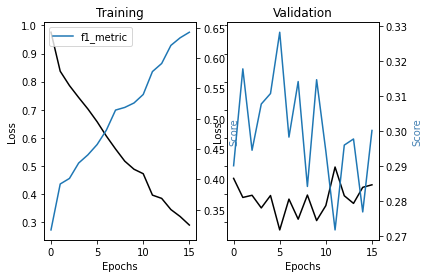

In [ ]:
w2v_model_trained, y_mapping = w2v_train(w2v_model, data_train["label"], X_train, x_valid, data_validation["label"])

Best Threshold=0.438600


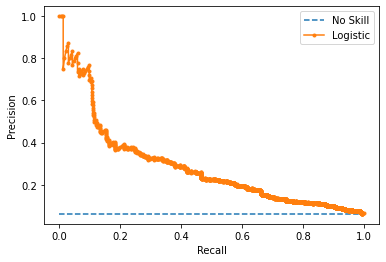

Accuracy: 0.9
Detail:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3585
           1       0.29      0.41      0.34       234

    accuracy                           0.90      3819
   macro avg       0.62      0.67      0.64      3819
weighted avg       0.92      0.90      0.91      3819



In [ ]:
w2v_test(w2v_model_trained, X_test, y_mapping, data_test["label"])

In [ ]:
tokenizer, dic_vocabulary, X_train = feature_engineering(lst_corpus, over_random_train_text)

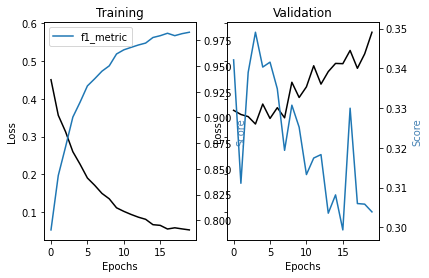

In [ ]:
w2v_model_trained, y_mapping = w2v_train(w2v_model, over_random_train["label"], X_train, x_valid, data_validation["label"])

Best Threshold=0.190268


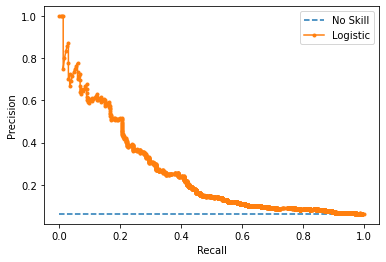

Accuracy: 0.92
Detail:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3585
           1       0.34      0.28      0.31       234

    accuracy                           0.92      3819
   macro avg       0.65      0.62      0.63      3819
weighted avg       0.92      0.92      0.92      3819



In [ ]:
w2v_test(w2v_model_trained, X_test, y_mapping, data_test["label"])

In [ ]:
w2v_model_trained.save("w2v_rn_over_random")

In [ ]:
tokenizer, dic_vocabulary, X_train = feature_engineering(lst_corpus, under_random_train_text)

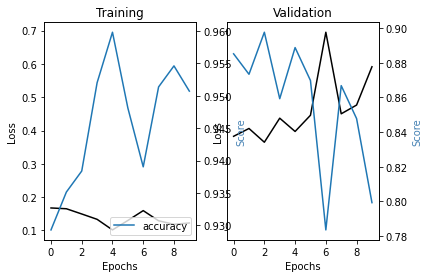

In [ ]:
w2v_model_trained, y_mapping = w2v_train(w2v_model, under_random_train["label"], X_train, x_valid, data_validation["label"])

In [ ]:
w2v_test(w2v_model_trained, X_test, y_mapping, data_test["label"])

Accuracy: 0.84
Detail:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3585
           1       0.18      0.44      0.26       234

    accuracy                           0.84      3819
   macro avg       0.57      0.66      0.59      3819
weighted avg       0.91      0.84      0.87      3819



In [ ]:
w2v_model_trained.save("w2v_rn_under_random")

Smote

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn import metrics

In [ ]:
def naive_Bayes_Classif(x_train, x_test, y_train, y_test):
  MNB = BernoulliNB()
  
  MNB.fit(x_train, y_train)
  predicted = MNB.predict(x_test)
  print(metrics.classification_report(y_test, predicted))


##### Count Vectorizer

In [ ]:
train_text = get_vocab(data_train["text"])
cv_train, cv = count_vectorizer(train_text)
test_text = get_vocab(data_test["text"])
cv_test =  cv.transform(test_text)

In [ ]:
from collections import Counter

In [ ]:
over_smote_train_text, over_smote_train_label = smote_oversampling(cv_train,data_train["label"])

Counter({1: 7293, 0: 7293})


In [ ]:
naive_Bayes_Classif(over_smote_train_text, cv_test, over_smote_train_label, data_test["label"])

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3585
           1       0.09      0.20      0.12       234

    accuracy                           0.82      3819
   macro avg       0.51      0.53      0.51      3819
weighted avg       0.89      0.82      0.85      3819



In [ ]:
over_smote_under_train_text, over_smote_under_train_label = smote_over_undersampling(cv_train,data_train["label"])
print(Counter(over_smote_under_train_label))

Counter({0: 7292, 1: 3646})


In [ ]:
naive_Bayes_Classif(over_smote_under_train_text, cv_test, over_smote_under_train_label, data_test["label"])

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3585
           1       0.13      0.20      0.16       234

    accuracy                           0.87      3819
   macro avg       0.54      0.56      0.54      3819
weighted avg       0.90      0.87      0.88      3819



In [ ]:
cv_train, cv = count_vectorizer(under_random_train_text)
cv_test =  cv.transform(test_text)
naive_Bayes_Classif(cv_train, cv_test, under_random_train["label"], data_test["label"])

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      3585
           1       0.16      0.70      0.25       234

    accuracy                           0.75      3819
   macro avg       0.57      0.73      0.55      3819
weighted avg       0.92      0.75      0.81      3819



In [ ]:
cv_train, cv = count_vectorizer(over_random_train_text)
cv_test =  cv.transform(test_text)
naive_Bayes_Classif(cv_train, cv_test, over_random_train["label"], data_test["label"])

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3585
           1       0.25      0.51      0.33       234

    accuracy                           0.87      3819
   macro avg       0.61      0.70      0.63      3819
weighted avg       0.92      0.87      0.89      3819



##### Tf.idf

In [ ]:
train_text = get_vocab(data_train["text"])
tf_train, tf = tf_idf_vectorizer(train_text)
test_text = get_vocab(data_test["text"])
tf_test =  tf.transform(test_text)

In [ ]:
over_smote_train_text, over_smote_train_label = smote_oversampling(tf_train,data_train["label"])
naive_Bayes_Classif(over_smote_train_text, tf_test, over_smote_train_label, data_test["label"])

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3585
           1       0.36      0.31      0.33       234

    accuracy                           0.92      3819
   macro avg       0.66      0.64      0.65      3819
weighted avg       0.92      0.92      0.92      3819



In [ ]:
over_smote_under_train_text, over_smote_under_train_label = smote_over_undersampling(tf_train,data_train["label"])
naive_Bayes_Classif(over_smote_under_train_text, tf_test, over_smote_under_train_label, data_test["label"])

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3585
           1       0.40      0.21      0.28       234

    accuracy                           0.93      3819
   macro avg       0.68      0.59      0.62      3819
weighted avg       0.92      0.93      0.92      3819



In [ ]:
tf_train, tf = tf_idf_vectorizer(under_random_train_text)
tf_test =  tf.transform(test_text)
naive_Bayes_Classif(tf_train, tf_test, under_random_train["label"], data_test["label"])

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      3585
           1       0.17      0.71      0.27       234

    accuracy                           0.76      3819
   macro avg       0.57      0.74      0.56      3819
weighted avg       0.93      0.76      0.82      3819



In [ ]:
tf_train, tf = tf_idf_vectorizer(over_random_train_text)
tf_test =  tf.transform(test_text)
naive_Bayes_Classif(tf_train, tf_test, over_random_train["label"], data_test["label"])

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3585
           1       0.25      0.50      0.33       234

    accuracy                           0.88      3819
   macro avg       0.61      0.70      0.63      3819
weighted avg       0.92      0.88      0.90      3819



### PyTorch Single model

In [ ]:
import pickle
from transformers import AutoModel, AdamW, AutoTokenizer, get_scheduler
from torch.utils.data import DataLoader, TensorDataset, Dataset, RandomSampler
import torch
from sklearn.utils import class_weight
import numpy as np
import torch.nn as nn
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn import metrics
from sklearn.metrics import f1_score

In [ ]:
#try with roberta and values from that article if it works
embedding_config = {
    "model_name": "vinai/bertweet-large",
    "path":"/content/drive/MyDrive/content/drive/models/bertweet-large",
    "max_length":40,
    "batch_size":16,
    "source":"HuggingFace"
}

In [ ]:
model_config = {
    "learning_rate" : 2e-5,
    "weight_decay":0.01,
    "epochs":20
}

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight="balanced", classes = np.unique(data_train["label"]), y=np.array(data_train["label"]))
print(class_weights)

[0.55285891 5.22957198]


In [ ]:
class BertClassfierPytorch(nn.Module):
  def __init__(self, input_size = 1024, output_size = 1):
    super().__init__()
    self.name = embedding_config["model_name"]
    self.tokenizer = AutoTokenizer.from_pretrained(embedding_config["model_name"], use_fast=False)
    self.embedder=AutoModel.from_pretrained(embedding_config["model_name"])
    self.dropout=nn.Dropout(0.5)
    self.classifier=nn.Linear(input_size, output_size)
    nn.init.xavier_uniform_(self.classifier.weight)

In [ ]:
#threshold??
def normalize(predicted):
  opt_threshold=0.5
  predicted = [threshold(pred, opt_threshold) for pred in 
              predicted]
  return predicted

def evaluate_predictions(predictions, labels):
  metrics.confusion_matrix(labels, predictions)
  print(metrics.classification_report(labels, predictions, digits=4))
  return f1_score(labels, predictions)


In [ ]:
def evaluate(model, x_test, y_test):
  x_test = model.tokenizer(x_test, padding  = "max_length", max_length = embedding_config["max_length"], truncation = True, return_tensors = "pt")
  test_data = TensorDataset(x_test["input_ids"], x_test["attention_mask"], torch.FloatTensor(y_test))

  batch_size = embedding_config["batch_size"]
  test_dataloader = DataLoader(test_data, batch_size=batch_size)

  preds=[]
  model.eval()
  for batch in test_dataloader:
    aux_batch = {
        "input_ids" : batch[0].to(device),
        "attention_mask" : batch[1].to(device)
    }

    with torch.no_grad():
      outputs = model.embedder(**aux_batch).pooler_output
      outputs = model.classifier(model.dropout(outputs))

    preds+=outputs.sigmoid().round().reshape(-1).tolist()
  
  predictions = normalize(preds)
  return evaluate_predictions(predictions, y_test)

In [ ]:
def train_model(model, x_train, y_train, x_valid, y_valid):
  max_score = 0
  
  x_train = model.tokenizer(x_train, padding  = "max_length", max_length = embedding_config["max_length"], truncation = True, return_tensors = "pt")
  train_data = TensorDataset(x_train["input_ids"], x_train["attention_mask"], torch.FloatTensor(y_train))

  batch_size = embedding_config["batch_size"]
  train_dataloader = DataLoader(train_data, batch_size=batch_size)

  num_epochs = model_config["epochs"]
  num_training_steps = num_epochs * len(train_dataloader)

  optimizer = AdamW(model.parameters(), lr = model_config["learning_rate"], weight_decay = model_config["weight_decay"])

  lr_scheduler = get_scheduler(
      "linear",
      optimizer = optimizer,
      num_warmup_steps = 0.2*num_training_steps,
      num_training_steps = num_training_steps
  )

  print("Steps ",num_training_steps)

  progress_bar = tqdm(range(num_training_steps))

  model.train()
  losses = []

  for epoch in range(num_epochs):
    model.train()
    print("Epoch: ", epoch+1)
    for batch in train_dataloader:
      aux_batch = {
        "input_ids" : batch[0].to(device),
        "attention_mask" : batch[1].to(device)
      }

      outputs = model.embedder(**aux_batch).pooler_output
      outputs = model.classifier(model.dropout(outputs))

      criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([5.2]).to(device))#??????????
      loss = criterion(outputs, batch[2].to(device).reshape(-1,1))

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      lr_scheduler.step()
      progress_bar.update(1)

    losses.append(loss.tolist())
    score =  evaluate(model, x_valid, y_valid)

    if score>max_score:
      max_score = score
      torch.save(model.state_dict(), embedding_config["path"]+".pt")  
  return num_training_steps, losses


In [ ]:
text_train = get_vocab(data_train["text"])
text_test = get_vocab(data_test["text"])
text_valid = get_vocab(data_validation["text"])

In [ ]:
model = BertClassfierPytorch()
model.to(device)

In [ ]:
num_training_steps, losses = train_model(model, text_train, data_train["label"], text_valid, data_validation["label"])

Steps  10080


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


  0%|          | 0/10080 [00:00<?, ?it/s]

Epoch:  1
              precision    recall  f1-score   support

           0     0.9388    0.9954    0.9663      2849
           1     0.5357    0.0750    0.1316       200

    accuracy                         0.9351      3049
   macro avg     0.7372    0.5352    0.5489      3049
weighted avg     0.9123    0.9351    0.9115      3049

Epoch:  2
              precision    recall  f1-score   support

           0     0.9573    0.9593    0.9583      2849
           1     0.4021    0.3900    0.3959       200

    accuracy                         0.9219      3049
   macro avg     0.6797    0.6746    0.6771      3049
weighted avg     0.9208    0.9219    0.9214      3049

Epoch:  3
              precision    recall  f1-score   support

           0     0.9650    0.9593    0.9622      2849
           1     0.4654    0.5050    0.4844       200

    accuracy                         0.9295      3049
   macro avg     0.7152    0.7321    0.7233      3049
weighted avg     0.9323    0.9295    0.9308 

Text(0.5, 0, 'step')

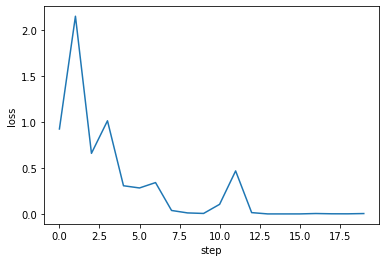

In [ ]:
plt.plot(range(model_config["epochs"]), losses)
plt.ylabel("loss")
plt.xlabel("step")

In [ ]:
load_model = BertClassfierPytorch()
#trainer smth look at roberta

Some weights of the model checkpoint at vinai/bertweet-large were not used when initializing RobertaModel: ['lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/bertweet-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use 

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/content/drive/"
path = join(ROOT_DIR, 'models', "bertweet-large.pt")
load_model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
load_model.to(device)
print(evaluate(load_model, text_test, data_test["label"]))

              precision    recall  f1-score   support

           0     0.9682    0.9607    0.9644      3585
           1     0.4618    0.5171    0.4879       234

    accuracy                         0.9335      3819
   macro avg     0.7150    0.7389    0.7262      3819
weighted avg     0.9372    0.9335    0.9352      3819

0.4879032258064517


### Ensemble Bert

In [ ]:
import pickle
from transformers import AutoModel, AdamW, AutoTokenizer, get_scheduler
from torch.utils.data import DataLoader, TensorDataset, Dataset, RandomSampler
import torch
from sklearn.utils import class_weight
import numpy as np
import torch.nn as nn
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn import metrics
from sklearn.metrics import f1_score

In [ ]:
text_train = get_vocab(data_train["text"])
text_test = get_vocab(data_test["text"])
text_valid = get_vocab(data_validation["text"])

In [ ]:
class BertPytorch(nn.Module):
  def __init__(self,name="vinai/bertweet-large", input_size = 1024, output_size = 1):
    embedding_config = {
      "model_name": name,
      "max_length":40,
      "batch_size":16,
      "source":"HuggingFace"
    }

    self.embedding_config = embedding_config

    model_config = {
        "learning_rate" : 0.01,
        "weight_decay":0.01,
        "epochs":10
    }
    self.model_config = model_config
    super().__init__()
    self.name = embedding_config["model_name"]
    self.tokenizer = AutoTokenizer.from_pretrained(embedding_config["model_name"], use_fast=False)
    self.embedder=AutoModel.from_pretrained(embedding_config["model_name"])
    self.dropout=nn.Dropout(0.5)
    self.classifier=nn.Linear(input_size, output_size)
    #nn.init.xavier_uniform_(self.classifier.weight)
  
  def forward(self, x):
    x_test = model.tokenizer(x, padding  = "max_length", max_length = embedding_config["max_length"], 
                             truncation = True, return_tensors = "pt")
    test_data = TensorDataset(x_test["input_ids"], x_test["attention_mask"])

    batch_size = embedding_config["batch_size"]
    test_dataloader = DataLoader(test_data, batch_size=batch_size)

    preds=[]
    for batch in test_dataloader:
      aux_batch = {
          "input_ids" : batch[0].to(device),
          "attention_mask" : batch[1].to(device)
      }

      with torch.no_grad():
        outputs = self.embedder(**aux_batch).pooler_output
        outputs = self.classifier(self.dropout(outputs))

      preds+=outputs.reshape(-1).tolist()
    
    return preds


In [ ]:
class EnsembleModel(nn.Module):
  def __init__(self, models):
      super(EnsembleModel, self).__init__()
      self.model=[]
      for model_name, model_dim in models:
        model_path = "/content/drive/MyDrive/content/drive/models"+model_name.split("/",1)[1]+".pt"
        self.models.append(BertPytorch(name=model_name, input_size = model_dim))
      self.classifier=nn.Linear(1024, 1)
      self.name = "x_train_ensemble"

  
  def forward(self, x):
      outs=[]
      for model in self.models:
        model_path = "/content/drive/MyDrive/content/drive/models"+model.name+".pt"
        new_model.load_state_dict(torch.load(model_path, map_location = device))
        new_model.to(device)
        new_model.eval()
        preds=new_model.forward(x)
        outs.append(preds)
      outs=np.array(outs).transpose()
    
      return outs

In [ ]:
config = {
    "model_name":"ensemble-model",
    "max_length":40,
    "batch_size":8,
    "learning_rate":0.0001,
    "epsilon": 1e-8,
    "weight_decay": 1e-02,
    "epochs":30
}

In [ ]:
class TrainEnsembleModel():
  def __init__(self, config): 
    self.config = config
    self.models = [
          ("cardiffnlp/twitter-roberta-base-sentiment", 1024),
          ("cardiffnlp/twitter-roberta-base-hate", 1024),
          ("cardiffnlp/twitter-roberta-base-emotion", 1024),
          ("cardiffnlp/twitter-roberta-base-offensive", 1024),
          ("cardiffnlp/twitter-roberta-base-irony", 1024),
          ("cardiffnlp/twitter-roberta-base", 1024),
          ("vinai/bertweet-large", 1024),
          ("vinai/bertweet-covid19-base-uncased", 1024),
          #("digitalepidemiologylab/covid-twitter-bert-v2", 1024),
          #("vinai/bertweet-covid19-base-cased", 1024),
          ("ningkko/drug-stance-bert", 1024),
          ("ml4pubmed/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext_pub_section", 1024),
          ("dmis-lab/biobert-large-cased-v1.1-mnli", 1024)
        ]

  def get_models_out(self, x, x_test=None, y_test=None):
      outs=[]
      for model_name, model_dim in self.models:
        model_path = "/content/drive/MyDrive/content/drive/models"+model_name.split("/",1)[1]+".pt"
        new_model = BertPytorch(name=model_name, input_size = model_dim)
        new_model.load_state_dict(torch.load(model_path, map_location = device))
        new_model.to(device)
        new_model.eval()
        preds=new_model.forward(x)
        outs.append(preds)
      outs=np.array(outs).transpose()
      return outs

  def train(self, x_train, y_train, x_valid, y_valid):
      model = EnsembleModel(self.models)
      model.to(device)
      #do train data encoding and get_models

      with open("/content/drive/MyDrive/content/drive/models/x_train_ensemble", "rb") as fd:
        x_train = pickle.load(fd)

      train_data = TensorDataset(torch.FloatTensor(x_train), torch.FloatTensor(y_train))

      batch_size = self.config["batch_size"]
      train_dataloader = DataLoader(train_data,shuffle=True, batch_size=batch_size)

      num_epochs = self.config["epochs"]
      num_training_steps = num_epochs * len(train_dataloader)

      optimizer = AdamW(model.parameters(), lr = self.config["learning_rate"], 
                        weight_decay = self.config["weight_decay"])

      lr_scheduler = get_scheduler(
          "linear",
          optimizer = optimizer,
          num_warmup_steps = 0.2*num_training_steps,
          num_training_steps = num_training_steps
      )

      progress_bar = tqdm(range(num_training_steps))
      max_score = 0 

      model.train()

      for epoch in range(num_epochs):
        model.train()
        print("Epoch: ", epoch+1)
        for batch in train_dataloader:
          aux_batch = {
            "x_train" : batch[0].to(device),
            "labels" : batch[1].to(device)
          }

          outputs = model.forward(aux_batch["x_train"])
          #outputs = model.classifier(model.dropout(outputs))

          criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([7.1]).to(device))#??????????
          loss = criterion(outputs, aux_batch["label"].reshape(-1,1))

          loss.backward()
          optimizer.step()
          optimizer.zero_grad()
          lr_scheduler.step()
          progress_bar.update(1)

        score =  self.evaluate(model, x_valid, y_valid)

        import copy
        if score>max_score:
          max_score = score
          best_model = copy.deepcopy(model)  
      return max_score, best_model

  def evaluate(self, x_test, y_test, model):
      preds = self.get_predictions(x_test, model)
      print(metrics.classification_report(y_test, preds, digits=4))
      return f1_score(y_test, preds)

  def get_predictions(self, x_test, model):
      x_test = self.get_models_out(x_test)
      test_data = TensorDataset(torch.FloatTensor(x_test))

      batch_size = self.config["batch_size"]
      test_dataloader = DataLoader(test_data, batch_size=batch_size)

      preds=[]
      model.eval()
      for batch in test_dataloader:
        aux_batch = {
            "x_test" : batch[0].to(device)
        }

        with torch.no_grad():
          outputs = model.forward(aux_batch["x_test"])

        preds+=outputs.sigmoid().round().reshape(-1).tolist()
      
      
      return preds


In [ ]:
trainer = TrainEnsembleModel(config)
# new_model = EnsembleModel()
# #actual path
# new_model.load_state_dict(embedding_config["path"]+".pt")
# new_model.to(device)
# new_model.eval()
# #?????
# preds=trainer.get_predictions(x_gold,new_model)
# max_score_total=0.0
# lr=0.0

# while config["learning_rate"]<0.05:
#   score, model = trainer.train(x_train, y_train, x_test, y_test)
#   if max_score_total<score:
#     max_score_total = score
#     lr=config["learning_rate"]
#     save_file="#path"
#     torch.save(model.state_dict(),save_file)
#   config["learning_rate"]+=0.0001
  

### RoBERTa

In [ ]:
import pandas as pd
import datasets
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification,Trainer, TrainingArguments
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, recall_score, precision_score
from tqdm import tqdm
import wandb
import os
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
from sklearn import metrics

##### Data Preparation

In [ ]:
data_train = load_dataframe("data1", "train.csv", "¦", "utf-8")
data_test = load_dataframe("data1", "test.csv", "¦", "utf-8")
data_validation = load_dataframe("data1", "validation.csv", "¦", "utf-8")

In [ ]:
data_train=data_train["train"]
data_test=data_test["train"]
data_valid=data_validation["train"]
data_train = data_train.remove_columns(['__index_level_0__'])
data_test = data_test.remove_columns(['__index_level_0__'])
data_valid = data_valid.remove_columns(['__index_level_0__'])
print(data_train)

Dataset({
    features: ['text', 'label'],
    num_rows: 8065
})


In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base')
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', max_length = 512)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
from datasets import ClassLabel, Value
data_train = data_train.select(range(1,len(data_train)))
new_features = data_train.features.copy()
new_features["label"] = Value('int32')
data_train = data_train.cast(new_features)
print(data_train.features)
# print(data_train["label"])

Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-14f1fc16cc811184/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-56b474ff7b93a38f.arrow


{'text': Value(dtype='string', id=None), 'label': Value(dtype='int32', id=None)}


In [ ]:
data_test = data_test.select(range(1,len(data_test)))
new_features = data_test.features.copy()
new_features["label"] = Value('int32')
data_test = data_test.cast(new_features)
print(data_test.features)
#print(data_test["label"])

Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-09a512314fe26add/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-ef08d2a6305ee901.arrow


{'text': Value(dtype='string', id=None), 'label': Value(dtype='int32', id=None)}


In [ ]:
data_valid = data_valid.select(range(1,len(data_valid)))
new_features = data_valid.features.copy()
new_features["label"] = Value('int32')
data_valid = data_valid.cast(new_features)
print(data_valid.features)
#print(data_valid["label"])

Loading cached processed dataset at /root/.cache/huggingface/datasets/csv/default-37d8e950c7f0feb6/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519/cache-92f4028a4c559609.arrow


{'text': Value(dtype='string', id=None), 'label': Value(dtype='int32', id=None)}


In [ ]:
def add_prefix(example):
    vocab=denoise_text(example['text'])
    vocab=remove_stopwords(vocab)
    vocab=word_tokenize(vocab)
    vocab=lemm(vocab)
    vocab=remove_amp(vocab)
    vocab = " ".join(vocab)
    example['text'] = vocab
    return example

In [ ]:
data_train = data_train.map(add_prefix)
data_test = data_test.map(add_prefix)
data_valid= data_valid.map(add_prefix)

  0%|          | 0/8064 [00:00<?, ?ex/s]

  0%|          | 0/3819 [00:00<?, ?ex/s]

  0%|          | 0/3049 [00:00<?, ?ex/s]

In [ ]:
def tokenization(batched_text):
    return tokenizer(batched_text['text'], padding = True, truncation=True)


data_train = data_train.map(tokenization, batched = True, batch_size = len(data_train))
data_test = data_test.map(tokenization, batched = True, batch_size = len(data_test))
data_valid = data_valid.map(tokenization, batched = True, batch_size = len(data_valid))

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
data_train.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
data_test.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
data_valid.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [ ]:
data_train = data_train.remove_columns(['text'])
data_test = data_test.remove_columns(['text'])
data_valid = data_valid.remove_columns(['text'])

##### Model Training

In [ ]:
# define accuracy metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    f1_class = f1_score(labels,preds)
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'f1_class': f1_class
    }

In [ ]:
# define the training arguments
training_args = TrainingArguments(
    output_dir = '/content/drive/MyDrive/content/drive/models/',
    num_train_epochs=3,
    per_device_train_batch_size = 4,
    gradient_accumulation_steps = 16,    
    per_device_eval_batch_size= 8,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    disable_tqdm = False, 
    load_best_model_at_end=True,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps = 8,
    fp16 = True,
    logging_dir='/content/drive/MyDrive/content/drive/models/',
    dataloader_num_workers = 8,
    run_name = 'roberta-classification'
)

In [ ]:
# instantiate the trainer class and check for available devices
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=data_train,
    eval_dataset=data_valid
)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

Using amp half precision backend


'cuda'

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 8064
  Num Epochs = 3
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 16
  Total optimizatio

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.333500,0.211414,0.934405,0.000000,0.000000,0.000000
2,0.237600,0.174114,0.937029,0.407407,0.532258,0.330000
3,0.189900,0.175044,0.931453,0.459948,0.475936,0.445000


***** Running Evaluation *****
  Num examples = 3049
  Batch size = 8
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to /content/drive/MyDrive/content/drive/models/checkpoint-126
Configuration saved in /content/drive/MyDrive/content/drive/models/checkpoint-126/config.json
Model weights saved in /content/drive/MyDrive/content/drive/models/checkpoint-126/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow

TrainOutput(global_step=378, training_loss=0.27765151148750666, metrics={'train_runtime': 458.2823, 'train_samples_per_second': 52.788, 'train_steps_per_second': 0.825, 'total_flos': 646463863019520.0, 'train_loss': 0.27765151148750666, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
***** Running Evaluation *****
  Num examples = 3049
  Batch size = 8


{'epoch': 3.0,
 'eval_accuracy': 0.937028533945556,
 'eval_f1': 0.40740740740740733,
 'eval_loss': 0.1741144210100174,
 'eval_precision': 0.532258064516129,
 'eval_recall': 0.33,
 'eval_runtime': 15.9661,
 'eval_samples_per_second': 190.967,
 'eval_steps_per_second': 23.926}

In [ ]:
predict = trainer.predict(data_train)

***** Running Prediction *****
  Num examples = 8064
  Batch size = 8


In [ ]:
predict_valid = trainer.predict(data_valid)

***** Running Prediction *****
  Num examples = 3049
  Batch size = 8


In [ ]:
print(predict_valid)

PredictionOutput(predictions=array([[ 0.4795, -0.3838],
       [ 1.977 , -1.902 ],
       [ 2.322 , -2.057 ],
       ...,
       [ 0.5854, -0.409 ],
       [ 1.006 , -0.8823],
       [ 1.743 , -1.5205]], dtype=float16), label_ids=array([1, 0, 0, ..., 0, 0, 0]), metrics={'test_loss': 0.1741144210100174, 'test_accuracy': 0.937028533945556, 'test_f1': 0.40740740740740733, 'test_precision': 0.532258064516129, 'test_recall': 0.33, 'test_runtime': 15.9336, 'test_samples_per_second': 191.357, 'test_steps_per_second': 23.975})


In [ ]:
def compute_metrics(pred, labels):
    #pred = np.argmax(pred, axis=1)
    #opt_threshold = -0.415737
    opt_threshold = 0
    #opt_threshold = roc_curve_threshold(pred, labels)
    #opt_threshold = max_f1_threshold(model,pred, labels)
    #opt_threshold = pr_curve_threshold(pred, labels)
    #opt_threshold = pr_curve_threshold(model.predict(X_valid), y_valid)
    #opt_threshold = opt_threshold_tuning(pred, labels)
    pred = [threshold(predi, opt_threshold) for predi in 
                pred]

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred, average=None)
    print(metrics.classification_report(labels, pred))

    return {"acc": accuracy, "prec": precision, "recall": recall, "f1": f1}

In [ ]:
print(compute_metrics(predict_valid.predictions[:, 1], predict_valid.label_ids))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2849
           1       0.49      0.43      0.46       200

    accuracy                           0.93      3049
   macro avg       0.73      0.70      0.71      3049
weighted avg       0.93      0.93      0.93      3049

{'acc': 0.9334207937028534, 'prec': 0.4915254237288136, 'recall': 0.435, 'f1': array([0.96451669, 0.46153846])}


Best Threshold=-0.174438, F-Score=0.681


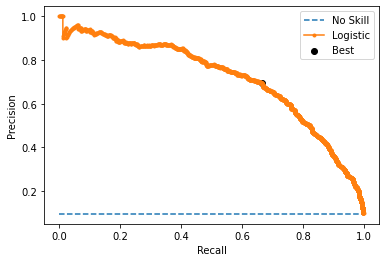

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7293
           1       0.70      0.67      0.68       771

    accuracy                           0.94      8064
   macro avg       0.83      0.82      0.82      8064
weighted avg       0.94      0.94      0.94      8064

{'acc': 0.9401041666666666, 'prec': 0.6951219512195121, 'recall': 0.6653696498054474, 'f1': array([0.9669608 , 0.67992048])}


In [ ]:
print(compute_metrics(predict.predictions[:, 1], predict.label_ids))

In [ ]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}
torch.save(model.state_dict(), '/content/drive/MyDrive/content/drive/models/roberta.pth')

load model and retest it

In [ ]:
roberta = RobertaForSequenceClassification.from_pretrained('/content/drive/MyDrive/content/drive/models/checkpoint-378')

In [ ]:
trainer = Trainer(
    model=roberta,
    compute_metrics=compute_metrics,
    train_dataset=data_train,
    eval_dataset=data_valid
)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
for label in data_valid["label"]:
  print(label)

In [ ]:
predict = trainer.predict(data_test)

***** Running Prediction *****
  Num examples = 3819
  Batch size = 8


In [ ]:
print(predict)

PredictionOutput(predictions=array([[ 0.78819335, -0.7730345 ],
       [ 1.9968073 , -1.7001115 ],
       [ 2.51383   , -2.2675931 ],
       ...,
       [ 2.6367056 , -2.3285627 ],
       [ 2.661645  , -2.4080138 ],
       [ 2.3858488 , -2.1450229 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 0, 0, 0]), metrics={'test_loss': 0.16626007854938507, 'test_accuracy': 0.940560356114166, 'test_f1': 0.4422604422604422, 'test_precision': 0.5202312138728323, 'test_recall': 0.38461538461538464, 'test_f1_class': 0.4422604422604422, 'test_runtime': 10.6638, 'test_samples_per_second': 358.126, 'test_steps_per_second': 44.824})


In [ ]:
length_half = len(predict.predictions[:, 1])//2
predict_test = predict.predictions[0:length_half, 1]
labels_test = predict.label_ids[0:length_half]
length = len(predict.predictions[:, 1])
predict_valid = predict.predictions[length_half:length, 1]
labels_valid = predict.label_ids[length_half:length]

Best Threshold=-0.415737, F-Score=0.429


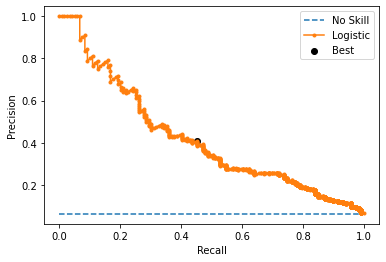

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1791
           1       0.40      0.45      0.42       119

    accuracy                           0.92      1910
   macro avg       0.68      0.70      0.69      1910
weighted avg       0.93      0.92      0.93      1910

{'acc': 0.9240837696335078, 'prec': 0.4015151515151515, 'recall': 0.44537815126050423, 'f1': array([0.95937237, 0.42231076])}


In [ ]:
print(compute_metrics(predict_valid, labels_valid))

In [ ]:
print(compute_metrics(predict_test, labels_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1794
           1       0.43      0.57      0.49       115

    accuracy                           0.93      1909
   macro avg       0.70      0.76      0.72      1909
weighted avg       0.94      0.93      0.93      1909

{'acc': 0.927710843373494, 'prec': 0.4258064516129032, 'recall': 0.5739130434782609, 'f1': array([0.96110485, 0.48888889])}


In [ ]:
print(compute_metrics(predict.predictions[:, 1], predict.label_ids))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3585
           1       0.42      0.51      0.46       234

    accuracy                           0.93      3819
   macro avg       0.69      0.73      0.71      3819
weighted avg       0.93      0.93      0.93      3819

{'acc': 0.9261586802827966, 'prec': 0.4166666666666667, 'recall': 0.5128205128205128, 'f1': array([0.96037099, 0.45977011])}


In [ ]:
print(compute_metrics(predict.predictions[:, 1], predict.label_ids))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3585
           1       0.51      0.42      0.46       234

    accuracy                           0.94      3819
   macro avg       0.73      0.70      0.71      3819
weighted avg       0.93      0.94      0.94      3819

{'acc': 0.9392511128567688, 'prec': 0.5051546391752577, 'recall': 0.4188034188034188, 'f1': array([0.96782247, 0.45794393])}


max=1.4193525
min=-2.6249154



In [ ]:
index = np.argmax(predict.predictions[:, 0])
print(predict.predictions[:, 0][index])

2.933488


### BERT (Sentence Transformers)

In [ ]:
from sentence_transformers import SentenceTransformer
from keras.models import Sequential
from keras.initializers import GlorotNormal
from keras.layers import Dense, Dropout, Bidirectional, LSTM, Embedding, Input, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from keras import models
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
from sklearn import model_selection, naive_bayes, svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
def sentence_transformers_embeddings(texts):
  model = SentenceTransformer("all-mpnet-base-v2")
  #model = SentenceTransformer("all-distilroberta-v1")

  #Sentences are encoded by calling model.encode()
  embeddings = model.encode(texts)

  return embeddings

#### RN

In [ ]:
def rn_bert_sent_transf_model(embeddings, y_train):
  input_size = len(embeddings[0])
  model = Sequential()
  initializer = GlorotNormal()
 
  model.add(Dense(96, input_shape=(input_size, ), activation="relu", kernel_initializer=initializer))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))
  opt = tf.keras.optimizers.Adam(learning_rate=2e-5)
  model.compile(loss='binary_crossentropy',
                optimizer=opt, metrics=[f1_metric])
  model.summary()
  return model

In [ ]:
def bert_sent_transf_train(model, y_train, X_train, X_valid, y_valid):
  dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
  #y_train = tf.one_hot(y_train, depth=2).numpy()
  
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)
  # y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
  # y_valid = np.asarray(y_valid).astype('float32').reshape((-1,1))
  #y_valid = tf.one_hot(y_valid, depth=2).numpy()
  #print(y_valid)
  early_stopping = EarlyStopping(
      min_delta=0.001, # minimium amount of change to count as an improvement
      patience=20, # how many epochs to wait before stopping
      restore_best_weights=True,
  )
  ## train
  training = model.fit(x=X_train, y=y_train, batch_size=32, 
                      epochs=10, shuffle=True, verbose=1, callbacks=[early_stopping],
                      validation_data=(X_valid, y_valid))
  #train with weights
  # class_weight={
  #     0:1.,
  #     1:9.
  # }
  # training = model.fit(x=X_train, y=y_train, batch_size=32, 
  #                     epochs=30, shuffle=True, verbose=1, callbacks=[early_stopping],
  #                     validation_data=(X_valid, y_valid), class_weight=class_weight)
  ## plot loss and accuracy
  metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
  fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
  ax[0].set(title="Training")
  ax11 = ax[0].twinx()
  ax[0].plot(training.history['loss'], color='black')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax11.plot(training.history[metric], label=metric)
  ax11.set_ylabel("Score", color='steelblue')
  ax11.legend()
  ax[1].set(title="Validation")
  ax22 = ax[1].twinx()
  ax[1].plot(training.history['val_loss'], color='black')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax22.plot(training.history['val_'+metric], label=metric)
  ax22.set_ylabel("Score", color="steelblue")
  plt.show()
  return model, dic_y_mapping

In [ ]:
def bert_sent_transf_test(model, X_test, y_test, X_valid, y_valid):
  predicted_prob = model.predict(X_test)
  #opt_threshold = 0.16
  opt_threshold = roc_curve_threshold(predicted_prob, y_test)
  #opt_threshold = max_f1_threshold(model,predicted_prob, y_test, X_test)
  #opt_threshold = pr_curve_threshold(predicted_prob, y_test)
  #opt_threshold = pr_curve_threshold(model.predict(X_valid), y_valid)
  # opt_threshold = opt_threshold_tuning(predicted_prob, y_test)
  predicted = [threshold(pred, opt_threshold) for pred in 
              predicted_prob]
  accuracy = metrics.accuracy_score(y_test, predicted)
  print("Accuracy:",  round(accuracy,2))
  print(metrics.classification_report(y_test, predicted))

In [ ]:
text_train = get_vocab(data_train["text"])
embeddings = sentence_transformers_embeddings(text_train)

In [ ]:
embeddings, embeddings_labels  = smote_over_undersampling(embeddings, data_train["label"])

In [ ]:
#bert_sentence_transformer_model = rn_bert_sent_transf_model(embeddings_smote_text, embeddings_smote_labels)

In [ ]:
bert_sentence_transformer_model = rn_bert_sent_transf_model(embeddings, embeddings_labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 96)                73824     
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 97        
                                                                 
Total params: 73,921
Trainable params: 73,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
text_valid = get_vocab(data_validation["text"])
embeddings_valid = sentence_transformers_embeddings(text_valid)

Epoch 1/10
234/234 [==============================] - 1s 6ms/step - loss: 0.5482 - f1_metric: 0.3781 - val_loss: 0.5383 - val_f1_metric: 0.4016
Epoch 2/10
234/234 [==============================] - 2s 8ms/step - loss: 0.5357 - f1_metric: 0.4598 - val_loss: 0.5281 - val_f1_metric: 0.4652
Epoch 3/10
234/234 [==============================] - 1s 4ms/step - loss: 0.5253 - f1_metric: 0.5013 - val_loss: 0.5184 - val_f1_metric: 0.5189
Epoch 4/10
234/234 [==============================] - 1s 4ms/step - loss: 0.5173 - f1_metric: 0.5302 - val_loss: 0.5095 - val_f1_metric: 0.5292
Epoch 5/10
234/234 [==============================] - 1s 4ms/step - loss: 0.5053 - f1_metric: 0.5587 - val_loss: 0.5010 - val_f1_metric: 0.5592
Epoch 6/10
234/234 [==============================] - 1s 4ms/step - loss: 0.4987 - f1_metric: 0.5711 - val_loss: 0.4932 - val_f1_metric: 0.5740
Epoch 7/10
234/234 [==============================] - 1s 4ms/step - loss: 0.4896 - f1_metric: 0.5847 - val_loss: 0.4859 - val_f1_metric:

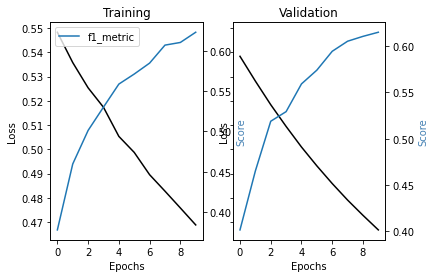

In [ ]:
trained_bert_sent_transf_model, dic_y_mapping = bert_sent_transf_train(bert_sentence_transformer_model, embeddings_labels, embeddings, embeddings_valid, data_validation["label"])

In [ ]:
test_df = data_test.dropna()
text_test = get_vocab(test_df["text"])
embeddings_test = sentence_transformers_embeddings(text_test)

In [ ]:
predicted_prob = trained_bert_sent_transf_model.predict(embeddings_test)
print(np.any(np.isnan(data_test["label"])))

True


Best Threshold=0.353716


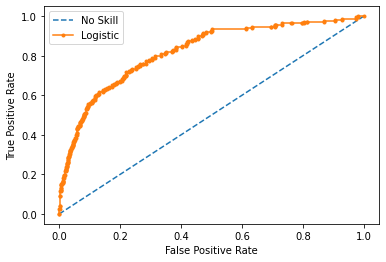

Accuracy: 0.78
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87      2467
         1.0       0.18      0.71      0.29       166

    accuracy                           0.78      2633
   macro avg       0.58      0.75      0.58      2633
weighted avg       0.93      0.78      0.83      2633



In [ ]:
bert_sent_transf_test(trained_bert_sent_transf_model, embeddings_test, test_df["label"], embeddings_valid, data_validation["label"])

In [ ]:
#at first i used 0.5 as a threshold, but since the classes are so imbalanced, computing a more suited threshold was necesary
bert_sent_transf_test(trained_bert_sent_transf_model, embeddings_valid, dic_y_mapping, data_validation["label"])

Threshold=0.233, F-Score=0.43830
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2849
           1       0.38      0.52      0.44       200

    accuracy                           0.91      3049
   macro avg       0.67      0.73      0.70      3049
weighted avg       0.93      0.91      0.92      3049



Best Threshold=0.247300


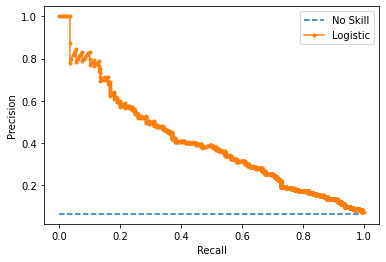

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2849
           1       0.39      0.49      0.44       200

    accuracy                           0.92      3049
   macro avg       0.68      0.72      0.70      3049
weighted avg       0.93      0.92      0.92      3049



In [ ]:
bert_sent_transf_test(trained_bert_sent_transf_model, embeddings_valid, dic_y_mapping, data_validation["label"])

In [ ]:
save_model(trained_bert_sent_transf_model, "bert_rn_pr.pickle")

INFO:tensorflow:Assets written to: ram://ce5b03ff-94ad-4766-9c5d-2e367c0362a6/assets


In [ ]:
trained_bert_sent_transf_model.save('/content/drive/MyDrive/content/drive/models/bert_rn_pr')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/content/drive/models/bert_rn_pr', custom_objects={'f1_metric':f1_metric})
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                73824     
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 97        
                                                                 
Total params: 73,921
Trainable params: 73,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
Labels = tf.one_hot(data_validation["label"], depth=2)
print(Labels)

#### Others

In [ ]:
text_train = get_vocab(data_train["text"])

In [ ]:
text_valid = get_vocab(data_validation["text"])

In [ ]:
text_test = get_vocab(data_test["text"])

In [ ]:
embeddings_train = sentence_transformers_embeddings(text_train)
embeddings_valid = sentence_transformers_embeddings(text_valid)
embeddings_test = sentence_transformers_embeddings(text_test)

In [ ]:
embeddings_smote_text, embeddings_smote_labels  = smote_over_undersampling(embeddings_train, data_train["label"])

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
svm_clsf = LinearSVC(C=0.05, max_iter=10000).fit(embeddings_smote_text,embeddings_smote_labels)
# predict the labels on validation dataset
predictions_SVM = svm_clsf.predict(embeddings_valid)
# Use accuracy_score function to get the accuracy
print("Accuracy Score -> ",accuracy_score(predictions_SVM, data_validation["label"])*100)
print("F1 Score -> ",f1_score(predictions_SVM, data_validation["label"]))

Accuracy Score ->  89.996720236143
F1 Score ->  0.41904761904761906


In [ ]:
save_model(svm_clsf,'svc_bert_smote_under.pickle')

In [ ]:
loaded_model = pickle.load(open('/content/drive/MyDrive/content/drive/models/svc_bert_smote_under.pickle', 'rb'))
result = loaded_model.predict(embeddings_test)
print("Accuracy Score -> ",accuracy_score(result, data_test["label"])*100)
print("F1 Score -> ",f1_score(result, data_test["label"]))
result = loaded_model.predict(embeddings_valid)
print("Accuracy Score -> ",accuracy_score(result, data_validation["label"])*100)
print("F1 Score -> ",f1_score(result, data_validation["label"]))


Accuracy Score ->  90.88766692851532
F1 Score ->  0.3851590106007067
Accuracy Score ->  89.996720236143
F1 Score ->  0.41904761904761906


In [ ]:
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear', C=0.05, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(embeddings_smote_text,embeddings_smote_labels)
probs = model.predict_proba(embeddings_test)
opt_threshold=0.5
#opt_threshold = roc_curve_threshold(probs[:, 1], data_test["label"])
#opt_threshold = pr_curve_threshold(probs[:, 1], data_test["label"])
  #opt_threshold = pr_curve_threshold(model.predict(X_valid), y_valid)
  # opt_threshold = opt_threshold_tuning(predicted_prob, y_test)
predicted = [threshold(pred, opt_threshold) for pred in 
              probs[:, 1]]
accuracy = metrics.accuracy_score(data_test["label"], predicted)
print("Accuracy:",  round(accuracy,2))
print(metrics.classification_report(data_test["label"], predicted))

[LibLinear]Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3585
           1       0.36      0.31      0.33       234

    accuracy                           0.92      3819
   macro avg       0.66      0.64      0.65      3819
weighted avg       0.92      0.92      0.92      3819



Best Threshold=0.666667


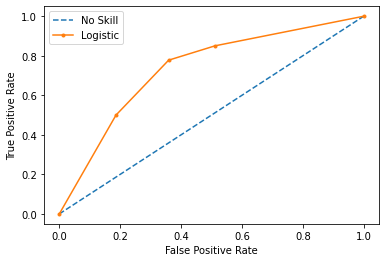

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      3585
           1       0.15      0.50      0.23       234

    accuracy                           0.79      3819
   macro avg       0.56      0.66      0.56      3819
weighted avg       0.91      0.79      0.84      3819



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Applying k = 3, default Minkowski distance metrics
model = KNeighborsClassifier(n_neighbors=3)
# Training the classifier
model.fit(embeddings_smote_text,embeddings_smote_labels)
probs = model.predict_proba(embeddings_test)
#opt_threshold=0.5
opt_threshold = roc_curve_threshold(probs[:, 1], data_test["label"])
#opt_threshold = pr_curve_threshold(probs[:, 1], data_test["label"])
  #opt_threshold = pr_curve_threshold(model.predict(X_valid), y_valid)
  # opt_threshold = opt_threshold_tuning(predicted_prob, y_test)
predicted = [threshold(pred, opt_threshold) for pred in 
              probs[:, 1]]
#predicted = model.predict(embeddings_test)
print(metrics.classification_report(data_test["label"], predicted))

In [ ]:
#ruleaza prea mult
classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=20)

classifier.fit(embeddings_smote_text,embeddings_smote_labels)

predicted = classifier.predict(embeddings_test)
print(metrics.classification_report(data_test["label"], predicted))

In [ ]:
clf = RandomForestClassifier()
clf.fit(embeddings_smote_text,embeddings_smote_labels)
predicted = clf.predict(embeddings_test)
print(metrics.classification_report(data_test["label"], predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3585
           1       0.52      0.05      0.09       234

    accuracy                           0.94      3819
   macro avg       0.73      0.52      0.53      3819
weighted avg       0.92      0.94      0.91      3819



Best Threshold=0.306652


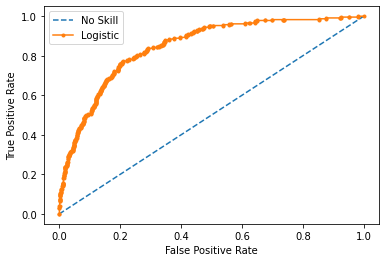

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      3585
           1       0.19      0.77      0.31       234

    accuracy                           0.79      3819
   macro avg       0.59      0.78      0.59      3819
weighted avg       0.93      0.79      0.84      3819



In [ ]:
opt_threshold = roc_curve_threshold(probs[:, 1], data_test["label"])
#opt_threshold = pr_curve_threshold(probs[:, 1], data_test["label"])
  #opt_threshold = pr_curve_threshold(model.predict(X_valid), y_valid)
  # opt_threshold = opt_threshold_tuning(predicted_prob, y_test)
predicted = [threshold(pred, opt_threshold) for pred in 
              probs[:, 1]]
#predicted = model.predict(embeddings_test)
print(metrics.classification_report(data_test["label"], predicted))

### BERT (Sentence Transformers) attempt 2



In [ ]:
from sentence_transformers import SentenceTransformer
from keras.models import Sequential
from keras.initializers import GlorotNormal
from keras.layers import Dense, Dropout, Bidirectional, LSTM, Embedding, Input, BatchNormalization, GRU
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from keras import models
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score
import pickle
from tensorflow.python.keras import regularizers

In [ ]:
model = SentenceTransformer("roberta-large-nli-stsb-mean-tokens")

In [ ]:
TRANSFORMER_BATCH=128

def count_embedd (df):
    df["text"]=get_vocab(df["text"])
    idx_chunk=list(df.columns).index('text')
    embedd_lst = []
    for index in range (0, len(df), TRANSFORMER_BATCH):
        embedds = model.encode(df.iloc[index:index+TRANSFORMER_BATCH, idx_chunk].values, show_progress_bar=False)
        embedd_lst.append(embedds)
    return np.concatenate(embedd_lst)

#### RN

In [ ]:
def rn_bert_sent_transf_model(embeddings, y_train):
  input_size = len(embeddings[0])
  model = Sequential()
  initializer = GlorotNormal()
 
  model.add(Dense(128, input_shape=(input_size, ), activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01),))
  model.add(Dropout(0.3))
  model.add(Dense(96, input_shape=(input_size, ), activation="relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01),))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid', kernel_initializer=initializer))
  opt = tf.keras.optimizers.Adam(learning_rate=5e-5, decay=5e-5 / 10)
  model.compile(loss='binary_crossentropy',
                optimizer=opt, metrics=[f1_metric, "accuracy"])
  model.summary()
  return model

In [ ]:
def bert_sent_transf_train(model, y_train, X_train, X_valid, y_valid):
  dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
  #X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

  early_stopping = EarlyStopping(
      min_delta=0.01, # minimium amount of change to count as an improvement
      patience=10, # how many epochs to wait before stopping
      restore_best_weights=True,
  )
  ## train
  training = model.fit(x=X_train, y=y_train, batch_size=32, 
                      epochs=10, shuffle=True, verbose=1, callbacks=[early_stopping],
                      validation_data=(X_valid, y_valid))

  metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
  fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
  ax[0].set(title="Training")
  ax11 = ax[0].twinx()
  ax[0].plot(training.history['loss'], color='black')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax11.plot(training.history[metric], label=metric)
  ax11.set_ylabel("Score", color='steelblue')
  ax11.legend()
  ax[1].set(title="Validation")
  ax22 = ax[1].twinx()
  ax[1].plot(training.history['val_loss'], color='black')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax22.plot(training.history['val_'+metric], label=metric)
  ax22.set_ylabel("Score", color="steelblue")
  plt.show()
  return model, dic_y_mapping

In [ ]:
def bert_sent_transf_test(model, X_test, y_test, X_valid, y_valid,opt_threshold):
  predicted_prob = model.predict(X_test)
  #print(model.predict(X_valid))
  #opt_threshold = 0.16
  #opt_threshold = roc_curve_threshold(predicted_prob, y_test)
  #opt_threshold = roc_curve_threshold(model.predict(X_valid), y_valid)
  #opt_threshold = max_f1_threshold(model,predicted_prob, y_test, X_test)
  opt_threshold = pr_curve_threshold(predicted_prob, y_test)
  #opt_threshold = pr_curve_threshold(model.predict(X_valid), y_valid)
  # opt_threshold = opt_threshold_tuning(predicted_prob, y_test)
  predicted = [threshold(pred, opt_threshold) for pred in 
              predicted_prob]
  accuracy = metrics.accuracy_score(y_test, predicted)
  print("Accuracy:",  round(accuracy,2))
  print(metrics.classification_report(y_test, predicted))

In [ ]:
data_train  = random_under_sampling(data_train)
embeddings = count_embedd(data_train)
embeddings_labels = data_train["label"]

In [ ]:
embeddings = count_embedd(data_train)
embeddings_valid = count_embedd(data_validation)
embedding_test = count_embedd(data_test)

In [ ]:
embeddings, embeddings_labels  = smote_over_undersampling(embeddings, data_train["label"])

In [ ]:
bert_sentence_transformer_model = rn_bert_sent_transf_model(embeddings, embeddings_labels)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 128)               131200    
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 96)                12384     
                                                                 
 dropout_36 (Dropout)        (None, 96)                0         
                                                                 
 dense_51 (Dense)            (None, 1)                 97        
                                                                 
Total params: 143,681
Trainable params: 143,681
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
49/49 [==============================] - 1s 12ms/step - loss: 4.1355 - f1_metric: 0.5774 - accuracy: 0.5350 - val_loss: 3.9862 - val_f1_metric: 0.1581 - val_accuracy: 0.6245
Epoch 2/10
49/49 [==============================] - 0s 10ms/step - loss: 3.9960 - f1_metric: 0.6116 - accuracy: 0.5921 - val_loss: 3.8709 - val_f1_metric: 0.1973 - val_accuracy: 0.7038
Epoch 3/10
49/49 [==============================] - 1s 11ms/step - loss: 3.9077 - f1_metric: 0.6276 - accuracy: 0.6252 - val_loss: 3.8021 - val_f1_metric: 0.2281 - val_accuracy: 0.7225
Epoch 4/10
49/49 [==============================] - 0s 10ms/step - loss: 3.8217 - f1_metric: 0.6689 - accuracy: 0.6543 - val_loss: 3.7297 - val_f1_metric: 0.2379 - val_accuracy: 0.7294
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 3.7471 - f1_metric: 0.6897 - accuracy: 0.6861 - val_loss: 3.6456 - val_f1_metric: 0.2467 - val_accuracy: 0.7494
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 3.

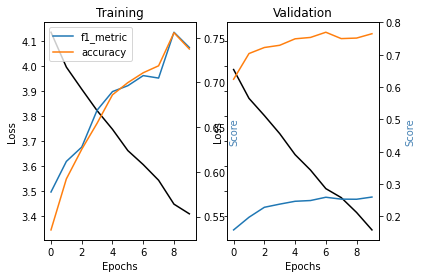

In [ ]:
trained_bert_sent_transf_model, dic_y_mapping = bert_sent_transf_train(bert_sentence_transformer_model, embeddings_labels, embeddings, embeddings_valid, data_validation["label"])

Best Threshold=0.713398, F-Score=0.299


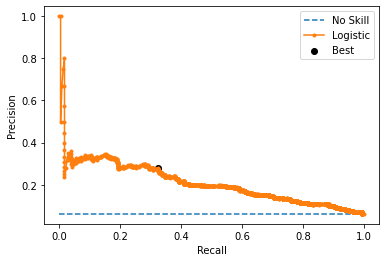

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3585
           1       0.27      0.32      0.30       234

    accuracy                           0.91      3819
   macro avg       0.61      0.63      0.62      3819
weighted avg       0.91      0.91      0.91      3819



In [ ]:
bert_sent_transf_test(trained_bert_sent_transf_model, embedding_test, data_test["label"], embeddings_valid, data_validation["label"], 0.4)

In [ ]:
save_model(trained_bert_sent_transf_model, "bert_rn_pr.pickle")

INFO:tensorflow:Assets written to: ram://ce5b03ff-94ad-4766-9c5d-2e367c0362a6/assets


### BERT Pytorch

In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_train=random_over_sampling(data_train)
train_text=get_vocab(data_train["text"])
valid_text=get_vocab(data_validation["text"])
test_text=get_vocab(data_test["text"])

In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(train_text)
X_val_tfidf = tf_idf.transform(valid_text)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
X_train_smote, smote_labels = smote_over_undersampling(X_train_tfidf, data_train["label"])

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_smote, smote_labels, scoring="roc_auc", cv=kf)

    return auc.mean()

In [ ]:
#completle useless

from sklearn.naive_bayes import BernoulliNB


res = pd.Series([get_auc_CV(BernoulliNB(alpha = i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=32,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True, 
            truncation=True
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(train_text)
val_inputs, val_masks = preprocessing_for_bert(valid_text)

Tokenizing data...


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(data_train["label"].tolist())
val_labels = torch.tensor(data_validation["label"])

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 32

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)


In [ ]:
test_labels = torch.tensor(data_test["label"])
test_inputs, test_masks = preprocessing_for_bert(test_text)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
bert_classifier, optimizer, scheduler = initialize_model(epochs=4)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a

In [ ]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val F1':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        
        accuracy = f1_score(b_labels.cpu().detach().numpy(),(preds.cpu().detach().numpy()))
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
set_seed(42)
train(bert_classifier, train_dataloader, val_dataloader, epochs=4, evaluation=True)

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)

In [ ]:
print(probs[1:])

[[0.9917989  0.00820115]
 [0.99202216 0.00797787]
 [0.9919512  0.00804884]
 ...
 [0.9918669  0.00813312]
 [0.99167633 0.00832371]
 [0.991646   0.00835402]]


Best Threshold=0.019291


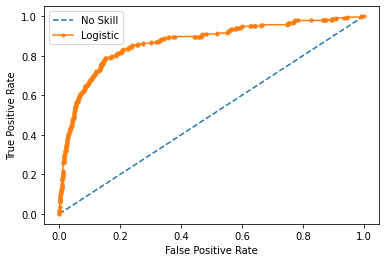

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      3585
           1       0.25      0.79      0.38       234

    accuracy                           0.84      3819
   macro avg       0.62      0.82      0.65      3819
weighted avg       0.94      0.84      0.88      3819



In [ ]:
from sklearn import metrics
opt_threshold = roc_curve_threshold(probs[:, 1], data_test["label"])
  #opt_threshold = pr_curve_threshold(model.predict(X_valid), y_valid)
  # opt_threshold = opt_threshold_tuning(predicted_prob, y_test)
predicted = [threshold(pred, opt_threshold) for pred in 
              probs[:, 1]]
print(metrics.classification_report(data_test["label"], predicted))

### RNN fine tuning

try with w2v and others

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
import tensorflow as tf

ModuleNotFoundError: ignored

In [ ]:
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':tf.keras.optimizers.Adam(learning_rate=learning_rate), 'SGD':tf.keras.optimizers.SGD(learning_rate=learning_rate),
                 'RMSprop':tf.keras.optimizers.RMSprop(learning_rate=learning_rate), 'Adadelta':tf.keras.optimizers.Adadelta(learning_rate=learning_rate),
                 'Adagrad':tf.keras.optimizers.Adagrad(learning_rate=learning_rate), 'Adamax':tf.keras.optimizers.Adamax(learning_rate=learning_rate),
                 'Nadam':tf.keras.optimizers.Nadam(learning_rate=learning_rate), 'Ftrl':tf.keras.optimizers.Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = tf.keras.optimizers.Adam(learning_rate = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=len(embeddings[0]), activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=[f1_metric])
        return nn
    es = EarlyStopping(monitor='f1_metric', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, embeddings, data_train["label"], scoring=make_scorer(f1_score), cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':tf.keras.optimizers.Adam(learning_rate=learning_rate), 'SGD':tf.keras.optimizers.SGD(learning_rate=learning_rate),
                 'RMSprop':tf.keras.optimizers.RMSprop(learning_rate=learning_rate), 'Adadelta':tf.keras.optimizers.Adadelta(learning_rate=learning_rate),
                 'Adagrad':tf.keras.optimizers.Adagrad(learning_rate=learning_rate), 'Adamax':tf.keras.optimizers.Adamax(learning_rate=learning_rate),
                 'Nadam':tf.keras.optimizers.Nadam(learning_rate=learning_rate), 'Ftrl':tf.keras.optimizers.Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=len(embeddings[0]), activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[f1_metric])
        return nn
    es = EarlyStopping(monitor='f1_metric', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, embeddings, data_train["label"], scoring=make_scorer(f1_score), cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
score_f1 = make_scorer(f1_score)
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 7),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

In [ ]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
print(params_nn_)

{'activation': 'tanh', 'batch_size': 851.0135336291902, 'epochs': 53.7054301919375, 'learning_rate': 0.037173480215022196, 'neurons': 50.872297884262295, 'optimizer': 0.7372825972056519}


In [ ]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 7),
    'optimizer':(0,7),
    'learning_rate':(0.00001, 0.0001),
    'batch_size':(7, 129),
    'epochs':(20, 1000),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo_l = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo_l.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will rai

|  1        |  0.0      |  4.285    |  27.63    |  0.4361   |  0.2308   |  309.4    |  1.298    |  1.045    |  4.782e-0 |  31.48    |  0.3377   |  6.935    |


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will rai

|  2        |  0.4626   |  1.664    |  16.91    |  0.6696   |  0.1864   |  288.8    |  1.932    |  1.237    |  1.666e-0 |  91.07    |  0.794    |  5.884    |


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will rai

|  3        |  0.1982   |  5.706    |  127.9    |  0.5773   |  0.2441   |  432.9    |  1.055    |  1.908    |  1.948e-0 |  83.55    |  0.6977   |  3.957    |


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will rai

|  4        |  0.0      |  1.92     |  128.8    |  0.138    |  0.1846   |  495.3    |  1.81     |  2.456    |  3.905e-0 |  46.05    |  0.319    |  6.631    |


/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"
/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:291: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


In [ ]:
params_nn_ = nn_bo_l.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':tf.keras.optimizers.Adam(learning_rate=learning_rate), 'SGD':tf.keras.optimizers.SGD(learning_rate=learning_rate),
                 'RMSprop':tf.keras.optimizers.RMSprop(learning_rate=learning_rate), 'Adadelta':tf.keras.optimizers.Adadelta(learning_rate=learning_rate),
                 'Adagrad':tf.keras.optimizers.Adagrad(learning_rate=learning_rate), 'Adamax':tf.keras.optimizers.Adamax(learning_rate=learning_rate),
                 'Nadam':tf.keras.optimizers.Nadam(learning_rate=learning_rate), 'Ftrl':tf.keras.optimizers.Ftrl(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
print(params_nn_)

{'activation': 'relu', 'batch_size': 242, 'dropout': 0.1279608146375314, 'dropout_rate': 0.010014947837176436, 'epochs': 38, 'layers1': 2, 'layers2': 1, 'learning_rate': 0.18755133602737314, 'neurons': 23, 'normalization': 0.6830131255680931, 'optimizer': <keras.optimizer_v2.adadelta.Adadelta object at 0x7f5d481d2690>}


In [ ]:
def nn_cl_fun():
  input_size = len(embeddings[0])
  initializer = GlorotNormal()
  
  nn = Sequential()
  nn.add(Dense(params_nn_['neurons'], input_shape=(input_size, ), activation="relu", kernel_initializer=initializer))
  if params_nn_['normalization'] > 0.5:
    nn.add(BatchNormalization())
  for i in range(params_nn_['layers1']):
    nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
  if params_nn_['dropout'] > 0.5:
    nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
  for i in range(params_nn_['layers2']):
    nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
  nn.add(Dense(1, activation='sigmoid'))
  nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=[f1_metric])
  nn.summary()
  return nn

In [ ]:
def bert_sent_transf_test(model, X_test, dic_y_mapping, y_test, X_valid, y_valid):
  predicted_prob = model.predict(X_test)
  print(predicted_prob)
  # opt_threshold = 0.5
  # opt_threshold = roc_curve_threshold(predicted_prob, y_test)
  #opt_threshold = max_f1_threshold(model,predicted_prob, y_test, X_test)
  #opt_threshold = pr_curve_threshold(predicted_prob, y_test)
  opt_threshold = pr_curve_threshold(model.predict(X_valid), y_valid)
  # opt_threshold = opt_threshold_tuning(predicted_prob, y_test)
  predicted = [threshold(pred, opt_threshold) for pred in 
              predicted_prob]
  accuracy = metrics.accuracy_score(y_test, predicted)
  print("Accuracy:",  round(accuracy,2))
  print(metrics.classification_report(y_test, predicted))

In [ ]:
def training_rn(X_train, y_train, X_valid, y_valid):
  es = EarlyStopping(monitor='f1_metric', mode='max', verbose=0, patience=20)
  # nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
  #                           verbose=0)
  nn=nn_cl_fun()
  # nn.fit(embeddings, data_train["label"], validation_data=(embeddings_valid, data_validation["label"]), verbose=1)
  training = nn.fit(x=X_train, y=y_train, batch_size=32, 
                        epochs=30, shuffle=True, verbose=1, callbacks=[es],
                        validation_data=(X_valid, y_valid))

  metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
  fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
  ax[0].set(title="Training")
  ax11 = ax[0].twinx()
  ax[0].plot(training.history['loss'], color='black')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax11.plot(training.history[metric], label=metric)
  ax11.set_ylabel("Score", color='steelblue')
  ax11.legend()
  ax[1].set(title="Validation")
  ax22 = ax[1].twinx()
  ax[1].plot(training.history['val_loss'], color='black')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax22.plot(training.history['val_'+metric], label=metric)
  ax22.set_ylabel("Score", color="steelblue")
  plt.show()
  return nn, dic_y_mapping

Model: "sequential_362"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1677 (Dense)          (None, 23)                17687     
                                                                 
 batch_normalization_96 (Bat  (None, 23)               92        
 chNormalization)                                                
                                                                 
 dense_1678 (Dense)          (None, 23)                552       
                                                                 
 dense_1679 (Dense)          (None, 23)                552       
                                                                 
 dense_1680 (Dense)          (None, 23)                552       
                                                                 
 dense_1681 (Dense)          (None, 1)                 24        
                                                    

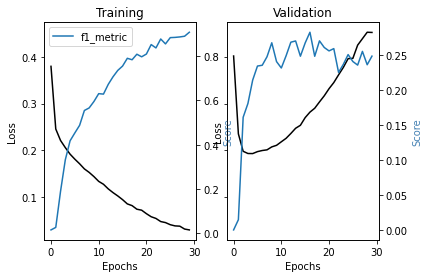

In [ ]:
model, dic_y_mapping = training_rn(embeddings, data_train["label"], embeddings_valid, data_validation["label"])

[[4.27264091e-08]
 [1.15390785e-05]
 [7.72993099e-06]
 ...
 [1.44099076e-05]
 [3.86162974e-05]
 [4.51575443e-06]]
Best Threshold=0.454818


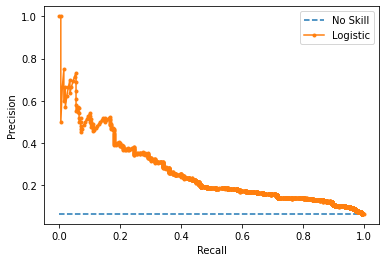

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3585
           1       0.32      0.24      0.27       234

    accuracy                           0.92      3819
   macro avg       0.63      0.60      0.62      3819
weighted avg       0.91      0.92      0.92      3819



In [ ]:
bert_sent_transf_test(model, embeddings_test, dic_y_mapping, data_test["label"], embeddings_valid, data_validation["label"])

### Plotting

In [ ]:
#word clouds

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def tweet_distribution(count_adr, count_noadr, index_names, fig_name):
  plotdata = pd.DataFrame({
    "ADR":count_adr,
    "no ADR":count_noadr},
    index=index_names)

  plotdata.plot(kind="bar",figsize=(15, 8))
  plt.title("Tweets distribution")
  plt.xlabel("Set")
  plt.ylabel("Tweets")
  plt.savefig(fig_name)

In [ ]:
train_labels = data_train["label"].tolist()
test_labels = data_test["label"].tolist()
valid_labels = data_validation["label"].tolist()

tweet_distribution([train_labels.count(1),test_labels.count(1),valid_labels.count(1)], [train_labels.count(0),test_labels.count(0),valid_labels.count(0)],["Train", "Test", "Validation"],"dataset1_distribution.png")


In [ ]:
train_labels = data_train["label"].tolist()
test_labels = data_test["label"].tolist()

tweet_distribution([train_labels.count(1),test_labels.count(1)], [train_labels.count(0),test_labels.count(0)],["Train", "Test"],"dataset2_distribution.png")


In [ ]:
train_labels = data_train["label"].tolist()

tweet_distribution([train_labels.count(1)], [train_labels.count(0)],["Train"],"dataset3_distribution.png")

### BERT3

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
data_train["text"]=get_vocab(data_train["text"])
data_test["text"]=get_vocab(data_test["text"])
data_validation["text"]=get_vocab(data_validation["text"])

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:
def tokenize_function (df):
    embedd_lst = []
    for index in range (0, len(df)):
        embedds = tokenizer(df["text"][index], padding="max_length", truncation=True)
        embedd_lst.append(embedds)
    return embedd_lst

tokenized_datasets_train = tokenize_function(data_train)
tokenized_datasets_test = tokenize_function(data_test)
tokenized_datasets_valid = tokenize_function(data_validation)

In [ ]:
data_train["text"]=tokenized_datasets_train
data_validation["text"]=tokenized_datasets_valid
data_test["text"]=tokenized_datasets_test

In [ ]:
from datasets import load_dataset, load_metric
from transformers import (AutoModelForSequenceClassification, AutoTokenizer,
                          Trainer, TrainingArguments)

# tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# dataset = load_dataset('glue', 'mrpc')
metric = load_metric("accuracy")

# def encode(examples):
#     outputs = tokenizer(
#         examples['sentence1'], examples['sentence2'], truncation=True)
#     return outputs

# encoded_dataset = dataset.map(encode, batched=True)

def model_init():
    return AutoModelForSequenceClassification.from_pretrained(
        'bert-base-uncased', return_dict=True)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.argmax(axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Evaluate during training and a bit more often
# than the default to be able to prune bad trials early.
# Disabling tqdm is a matter of preference.
training_args = TrainingArguments(
    "test", evaluation_strategy="steps", eval_steps=500, disable_tqdm=True)
trainer = Trainer(
    args=training_args,
    tokenizer=tokenizer,
    train_dataset=data_train,
    eval_dataset=data_validation,
    model_init=model_init,
    compute_metrics=compute_metrics,
)

# Default objective is the sum of all metrics
# when metrics are provided, so we have to maximize it.
trainer.hyperparameter_search(
    direction="maximize", 
    backend="ray", 
    n_trials=10 # number of trials
)

https://huggingface.co/bert-base-uncased/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp9usru7q9


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
creating metadata file for /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "h

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

storing https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
creating metadata file for /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
loading weights file https://huggingface.co/bert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/a8041bf617d7f94ea26d15e218abd04afc2004805632abc0ed2066aa16d50d04.faf6ea826ae9c5867d12b22257f9877e6b8367890837bd60f7c54a29633f7f2f
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions

== Status ==
Current time: 2022-06-03 18:50:34 (running for 00:00:00.23)
Memory usage on this node: 6.3/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (9 PENDING, 1 RUNNING)
+------------------------+----------+----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc            |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+----------------+-----------------+--------------------+-------------------------------+----------|
| _objective_0cc93_00000 | RUNNING  | 172.28.0.2:788 |     5.61152e-06 |                  5 |                            64 |  8.15396 |
| _objective_0cc93_00001 | PENDING  |                |     1.56207e-05 |        

(_objective pid=788) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
(_objective pid=788) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=788) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=788) Some weight

== Status ==
Current time: 2022-06-03 18:50:55 (running for 00:00:21.05)
Memory usage on this node: 12.3/12.7 GiB: ***LOW MEMORY*** less than 10% of the memory on this node is available for use. This can cause unexpected crashes. Consider reducing the memory used by your application or reducing the Ray object store size by setting `object_store_memory` when calling `ray.init`.
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (9 PENDING, 1 RUNNING)
+------------------------+----------+----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc            |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+----------------+-----------------+---------------

(_objective pid=788) /usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
(_objective pid=788)   FutureWarning,
(_objective pid=788) 2022-06-03 18:50:55,804	ERROR function_runner.py:281 -- Runner Thread raised error.
(_objective pid=788) Traceback (most recent call last):
(_objective pid=788)   File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
(_objective pid=788)     return self._engine.get_loc(casted_key)
(_objective pid=788)   File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
(_objective pid=788)   File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
(_objective pid=788)   File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._

Result for _objective_0cc93_00000:
  date: 2022-06-03_18-50-40
  experiment_id: a64bc208560141e8a8f3c720a6ca59c9
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 788
  timestamp: 1654282240
  trial_id: 0cc93_00000
  
== Status ==
Current time: 2022-06-03 18:51:01 (running for 00:00:27.17)
Memory usage on this node: 7.6/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (1 ERROR, 8 PENDING, 1 RUNNING)
+------------------------+----------+----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc            |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+----------------+-----------------+--------------------+------------------------------

(_objective pid=837) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
(_objective pid=837) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=837) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=837) Some weight

Result for _objective_0cc93_00001:
  date: 2022-06-03_18-51-08
  experiment_id: 701cf45e73e54ed6aac296ffab80484b
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 837
  timestamp: 1654282268
  trial_id: 0cc93_00001
  


2022-06-03 18:51:33,363	INFO trial_runner.py:803 -- starting _objective_0cc93_00002


== Status ==
Current time: 2022-06-03 18:51:38 (running for 00:01:04.28)
Memory usage on this node: 7.4/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (2 ERROR, 7 PENDING, 1 RUNNING)
+------------------------+----------+----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc            |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+----------------+-----------------+--------------------+-------------------------------+----------|
| _objective_0cc93_00002 | RUNNING  | 172.28.0.2:894 |     8.28892e-06 |                  5 |                            16 | 24.4435  |
| _objective_0cc93_00003 | PENDING  |                |     1.09943e-06 

(_objective pid=894) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
(_objective pid=894) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=894) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=894) Some weight

Result for _objective_0cc93_00002:
  date: 2022-06-03_18-51-45
  experiment_id: 2f0abd34991945558b904edd49b50870
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 894
  timestamp: 1654282305
  trial_id: 0cc93_00002
  


2022-06-03 18:52:10,466	INFO trial_runner.py:803 -- starting _objective_0cc93_00003


== Status ==
Current time: 2022-06-03 18:52:15 (running for 00:01:41.38)
Memory usage on this node: 7.4/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (3 ERROR, 6 PENDING, 1 RUNNING)
+------------------------+----------+----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc            |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+----------------+-----------------+--------------------+-------------------------------+----------|
| _objective_0cc93_00003 | RUNNING  | 172.28.0.2:952 |     1.09943e-06 |                  2 |                             8 | 29.158   |
| _objective_0cc93_00004 | PENDING  |                |     2.3102e-06  

(_objective pid=952) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
(_objective pid=952) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=952) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=952) Some weight

Result for _objective_0cc93_00003:
  date: 2022-06-03_18-52-23
  experiment_id: e1905e3597494724b44b250672666811
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 952
  timestamp: 1654282343
  trial_id: 0cc93_00003
  


2022-06-03 18:52:45,475	INFO trial_runner.py:803 -- starting _objective_0cc93_00004


== Status ==
Current time: 2022-06-03 18:52:50 (running for 00:02:16.35)
Memory usage on this node: 7.4/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (4 ERROR, 5 PENDING, 1 RUNNING)
+------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc             |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------|
| _objective_0cc93_00004 | RUNNING  | 172.28.0.2:1006 |     2.3102e-06  |                  5 |                             8 | 25.0818  |
| _objective_0cc93_00005 | PENDING  |                 |     1.12076

(_objective pid=1006) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
(_objective pid=1006) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=1006) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=1006) Some we

Result for _objective_0cc93_00004:
  date: 2022-06-03_18-52-57
  experiment_id: 14576b085fc54daebe13ab7491f7050d
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 1006
  timestamp: 1654282377
  trial_id: 0cc93_00004
  


2022-06-03 18:53:22,488	INFO trial_runner.py:803 -- starting _objective_0cc93_00005


== Status ==
Current time: 2022-06-03 18:53:27 (running for 00:02:53.37)
Memory usage on this node: 7.4/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (5 ERROR, 4 PENDING, 1 RUNNING)
+------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc             |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------|
| _objective_0cc93_00005 | RUNNING  | 172.28.0.2:1063 |     1.12076e-05 |                  4 |                            16 |  1.89943 |
| _objective_0cc93_00006 | PENDING  |                 |     1.67381

(_objective pid=1063) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
(_objective pid=1063) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=1063) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=1063) Some we

Result for _objective_0cc93_00005:
  date: 2022-06-03_18-53-35
  experiment_id: 52198a2cfc6749e7a004471df0d4aff0
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 1063
  timestamp: 1654282415
  trial_id: 0cc93_00005
  


2022-06-03 18:53:57,502	INFO trial_runner.py:803 -- starting _objective_0cc93_00006


== Status ==
Current time: 2022-06-03 18:54:02 (running for 00:03:28.34)
Memory usage on this node: 7.4/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (6 ERROR, 3 PENDING, 1 RUNNING)
+------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc             |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------|
| _objective_0cc93_00006 | RUNNING  | 172.28.0.2:1120 |     1.67381e-05 |                  2 |                            32 |  2.81996 |
| _objective_0cc93_00007 | PENDING  |                 |     5.4041e

(_objective pid=1120) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
(_objective pid=1120) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=1120) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=1120) Some we

Result for _objective_0cc93_00006:
  date: 2022-06-03_18-54-09
  experiment_id: 86a0f007ecc24fdbad1a84e7ab0449ab
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 1120
  timestamp: 1654282449
  trial_id: 0cc93_00006
  


2022-06-03 18:54:31,510	INFO trial_runner.py:803 -- starting _objective_0cc93_00007


== Status ==
Current time: 2022-06-03 18:54:36 (running for 00:04:02.42)
Memory usage on this node: 7.4/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (7 ERROR, 2 PENDING, 1 RUNNING)
+------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc             |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------|
| _objective_0cc93_00007 | RUNNING  | 172.28.0.2:1174 |     5.4041e-06  |                  3 |                            32 | 15.916   |
| _objective_0cc93_00008 | PENDING  |                 |     1.53049

(_objective pid=1174) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
(_objective pid=1174) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=1174) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=1174) Some we

Result for _objective_0cc93_00007:
  date: 2022-06-03_18-54-44
  experiment_id: 60aab9f3a02344c2b9a9a60cfddb8e8b
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 1174
  timestamp: 1654282484
  trial_id: 0cc93_00007
  


2022-06-03 18:55:07,534	INFO trial_runner.py:803 -- starting _objective_0cc93_00008


== Status ==
Current time: 2022-06-03 18:55:12 (running for 00:04:38.43)
Memory usage on this node: 7.4/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (8 ERROR, 1 PENDING, 1 RUNNING)
+------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc             |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------|
| _objective_0cc93_00008 | RUNNING  | 172.28.0.2:1230 |     1.53049e-05 |                  3 |                            64 | 34.5377  |
| _objective_0cc93_00009 | PENDING  |                 |     7.96157

(_objective pid=1230) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
(_objective pid=1230) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=1230) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=1230) Some we

Result for _objective_0cc93_00008:
  date: 2022-06-03_18-55-20
  experiment_id: 60aa32a3c3cc4bba9d08aa424bca2138
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 1230
  timestamp: 1654282520
  trial_id: 0cc93_00008
  


2022-06-03 18:55:42,562	INFO trial_runner.py:803 -- starting _objective_0cc93_00009


== Status ==
Current time: 2022-06-03 18:55:47 (running for 00:05:13.53)
Memory usage on this node: 7.4/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (9 ERROR, 1 RUNNING)
+------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc             |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------|
| _objective_0cc93_00009 | RUNNING  | 172.28.0.2:1278 |     7.96157e-06 |                  2 |                            32 | 38.0065  |
| _objective_0cc93_00000 | ERROR    | 172.28.0.2:788  |     5.61152e-06 |     

(_objective pid=1278) Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
(_objective pid=1278) - This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=1278) - This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objective pid=1278) Some we

Result for _objective_0cc93_00009:
  date: 2022-06-03_18-55-55
  experiment_id: 3f8de23dedca4a2f9c0e2ec5746d8676
  hostname: 6840e20c181a
  node_ip: 172.28.0.2
  pid: 1278
  timestamp: 1654282555
  trial_id: 0cc93_00009
  
== Status ==
Current time: 2022-06-03 18:56:16 (running for 00:05:42.32)
Memory usage on this node: 11.2/12.7 GiB
Using FIFO scheduling algorithm.
Resources requested: 0/2 CPUs, 0/1 GPUs, 0.0/7.21 GiB heap, 0.0/3.61 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/_objective_2022-06-03_18-50-34
Number of trials: 10/10 (10 ERROR)
+------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------+
| Trial name             | status   | loc             |   learning_rate |   num_train_epochs |   per_device_train_batch_size |     seed |
|------------------------+----------+-----------------+-----------------+--------------------+-------------------------------+----------|
| _obj

TuneError: ignored

In [ ]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
probs = bert_predict(bert_classifier, test_dataloader)

In [ ]:
from sklearn import metrics
opt_threshold = roc_curve_threshold(probs[:, 1], data_test["label"])
  #opt_threshold = pr_curve_threshold(model.predict(X_valid), y_valid)
  # opt_threshold = opt_threshold_tuning(predicted_prob, y_test)
predicted = [threshold(pred, opt_threshold) for pred in 
              probs[:, 1]]
print(metrics.classification_report(data_test["label"], predicted))

### BERT tensorflow

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
#import tensorflow_models as tfm
import tensorflow_hub as hub
import tensorflow.keras as keras
#from bert import tokenizer

In [ ]:
# import numpy as np
# import tensorflow as tf
# import tensorflow_hub as hub
# import tensorflow_models as tfm
from official.nlp.data import classifier_data_lib
#from official.nlp.bert import tokenization
# from official.nlp import optimization

# import seaborn as sns
import wandb
from wandb.keras import WandbCallback

In [ ]:
train_text=get_vocab(data_train["text"])

In [ ]:
valid_text=get_vocab(data_validation["text"])

In [ ]:
print('Average word length of questions in train dataset is {0:.0f}.'.format(np.mean(data_train["text"].apply(lambda x: len(x.split())))))
print('Max word length of questions in train dataset is {0:.0f}.'.format(np.max(data_train["text"].apply(lambda x: len(x.split())))))
print('Average character length of questions in train dataset is {0:.0f}.'.format(np.mean(data_train["text"].apply(lambda x: len(x)))))
print('Average word length of questions in valid dataset is {0:.0f}.'.format(np.mean(data_validation["text"].apply(lambda x: len(x.split())))))
print('Max word length of questions in valid dataset is {0:.0f}.'.format(np.max(data_validation["text"].apply(lambda x: len(x.split())))))
print('Average character length of questions in valid dataset is {0:.0f}.'.format(np.mean(data_validation["text"].apply(lambda x: len(x)))))

Average word length of questions in train dataset is 16.
Max word length of questions in train dataset is 33.
Average character length of questions in train dataset is 100.
Average word length of questions in valid dataset is 17.
Max word length of questions in valid dataset is 33.
Average character length of questions in valid dataset is 104.


Text(0.5, 1.0, 'Distribution of question text length in words')

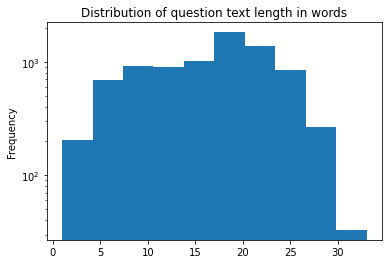

In [ ]:
data_train["text"].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Distribution of question text length in words')

Text(0.5, 1.0, 'Distribution of question text length in words')

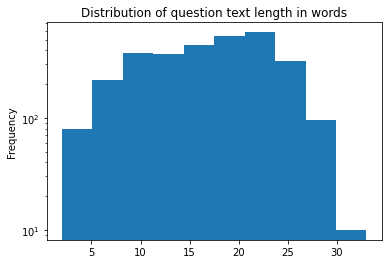

In [ ]:
data_validation["text"].apply(lambda x: len(x.split())).plot(kind='hist');
plt.yscale('log');
plt.title('Distribution of question text length in words')

Text(0.5, 1.0, 'Distribution of question text length in characters')

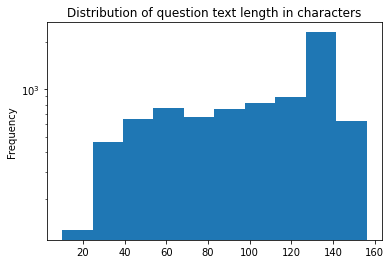

In [ ]:
data_train["text"].apply(lambda x: len(x)).plot(kind='hist');
plt.yscale('log');
plt.title('Distribution of question text length in characters')

Text(0.5, 1.0, 'Distribution of question text length in characters')

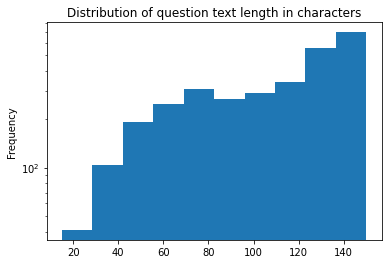

In [ ]:
data_validation["text"].apply(lambda x: len(x)).plot(kind='hist');
plt.yscale('log');
plt.title('Distribution of question text length in characters')

In [ ]:
train_df = data_train.dropna()
train_texts = train_df["text"].tolist()

valid_df = data_validation.dropna()
valid_texts = valid_df["text"].tolist()

with tf.device('/GPU:0'):
    train_data = tf.data.Dataset.from_tensor_slices((train_text, train_df["label"].tolist()))
    valid_data = tf.data.Dataset.from_tensor_slices((valid_text,valid_df["label"].tolist()))
    # lets look at 3 samples from train set
    for text,label in train_data.take(3):
        print(text)
        print(label)

tf.Tensor(b'anyone noticed lasted day got another scrip need levaquin', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(b'pd sertraline v fluoxetine make bet', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(b'trazodone gave son sleep aid drs see latest research antidepressant bipolar', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
config = {'label_list' : [0, 1], # Label categories
          'max_seq_length' : 32, # maximum length of (token) input sequences
          'train_batch_size' : 32,
          'learning_rate': 2e-5,
          'epochs':5,
          'optimizer': 'adam',
          'dropout': 0.5,
          'train_samples': len(train_data),
          'valid_samples': len(valid_data),
          # 'train_split'﻿:﻿0.1﻿,
          # 'valid_split'﻿: 0.01
         }

In [ ]:
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2',
                            trainable=True)
# vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
# do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() # checks if the bert layer we are using is uncased or not
# tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

#texts_encodings = tokenizer(texts, truncation=True, padding=True)

In [ ]:
input_string = train_text[0]
print(tokenizer.tokenize(input_string))
print(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(input_string)))

['anyone', 'noticed', 'lasted', 'day', 'got', 'another', 's', '##c', '##rip', 'need', 'le', '##va', '##quin']
[2256, 3535, 5695, 1285, 1400, 1330, 188, 1665, 16669, 1444, 5837, 2497, 12934]


In [ ]:
def create_feature(text, label, label_list=config['label_list'], max_seq_length=config['max_seq_length'], tokenizer=tokenizer):
    # since we only have 1 sentence for classification purpose, textr_b is None
    example = classifier_data_lib.InputExample(guid = None,
                                            text_a = text.numpy(), 
                                            text_b = None, 
                                            label = label.numpy())
    # since only 1 example, the index=0
    feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)
    return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

In [ ]:
def create_feature_map(text, label):
    input_ids, input_mask, segment_ids, label_id = tf.py_function(create_feature, inp=[text, label], 
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
    max_seq_length = config['max_seq_length']

    # py_func doesn't set the shape of the returned tensors.
    input_ids.set_shape([max_seq_length])
    input_mask.set_shape([max_seq_length])
    segment_ids.set_shape([max_seq_length])
    label_id.set_shape([])

    x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids,
    }
    return (x, label_id)

In [ ]:
with tf.device('/GPU:0'):
  # train
  train_data = (train_data.map(create_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .shuffle(1000)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data = (valid_data.map(create_feature_map, 
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE)) 

In [ ]:
train_encodings = tokenizer(train_text, truncation=True, padding=True, max_length=config['max_seq_length'],)
  #train_smote_encodings, train_smote_encodings_labels = smote_oversampling(train_encodings, data_train["label"]) 
valid_encodings = tokenizer(valid_text, truncation=True, padding=True, max_length=config['max_seq_length'],)

In [ ]:
#print(train_encodings)
x_train = {
        'input_word_ids': train_encodings['input_ids'],
        'input_mask': train_encodings['input_masks'],
        'input_type_ids': train_encodings['segment_ids'],
    }
print(train_encodings)

KeyError: ignored

In [ ]:
def create_model():
    
    input_word_ids = tf.keras.layers.Input(shape=(config['max_seq_length'],), 
					                                 dtype=tf.int32,
                                           name="input_word_ids")

    input_mask = tf.keras.layers.Input(shape=(config['max_seq_length'],), 
					                          dtype=tf.int32,
                                   	name="input_mask")

    input_type_ids = tf.keras.layers.Input(shape=(config['max_seq_length'],), 
					                                dtype=tf.int32,
                                    	    name="input_type_ids")


    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])
    # for classification we only care about the pooled-output.
    # At this point we can play around with the classification head based on the 
    # downstream tasks and its complexity

    drop = tf.keras.layers.Dropout(config['dropout'])(pooled_output)
    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(drop)

    # inputs coming from the function
    model = tf.keras.Model(
      inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids}, 
      outputs=output)

    return model

In [ ]:
# Calling the create model function to get the keras based functional model
model = create_model()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config['learning_rate']),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       f1_metric])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 32)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 32)]         0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 32)]         0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 32, 768)]                 'input_mask[0][0]',       

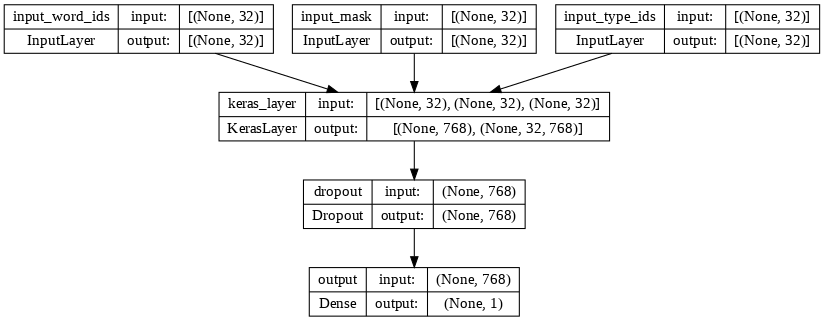

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76, )

In [ ]:
# Update CONFIG dict with the name of the model.
config['model_name'] = 'BERT_EN_UNCASED'
print('Training configuration: ', config)

# Initialize W&B run
run = wandb.init(project='Finetune-BERT-Text-Classification', 
                 config=config,
                 group='BERT_EN_UNCASED', 
                 job_type='train')

Training configuration:  {'label_list': [0, 1], 'max_seq_length': 32, 'train_batch_size': 32, 'learning_rate': 2e-05, 'epochs': 5, 'optimizer': 'adam', 'dropout': 0.5, 'train_samples': 8064, 'valid_samples': 3049, 'model_name': 'BERT_EN_UNCASED'}


In [ ]:
epochs = config['epochs']
# training = model.fit(x=X_train, y=y_train, batch_size=32, 
#                       epochs=100, shuffle=True, verbose=1, callbacks=[early_stopping],
#                       validation_data=(X_valid, y_valid))
history = model.fit(x=np.array(train_encodings), y=np.asarray(data_train["label"]),
                    validation_data=(np.array(valid_encodings),np.asarray(data_validation["label"])),
                    epochs=epochs,
                    verbose=1,
                    callbacks = [WandbCallback()])
run.finish()

ValueError: ignored

### Word2Vec 2

In [ ]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import logging  # Setting up the loggings to monitor gensim
from gensim.models import Word2Vec
import numpy as np
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [ ]:
def w2v_preprocess(data_train,data_test):
  train_text = get_vocab(data_train["text"])
  test_text = get_vocab(data_test["text"])
  train_df = pd.DataFrame({
        'text': train_text,
        'label':data_train["label"]
    })
  return train_df, test_text

In [ ]:
from gensim.models.phrases import Phrases, Phraser
def w2v_bigrams(train_df):
  sent = [row.split() for row in train_df['text']]
  phrases = Phrases(sent, min_count=30, progress_per=1000)
  bigram = Phraser(phrases)
  sentences = bigram[sent]
  return sentences

In [ ]:
def w2v_train_model(train_texts):
  w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)
  w2v_model.build_vocab(train_texts, progress_per=1000)
  w2v_model.train(train_texts, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
  return w2v_model

In [ ]:
from keras.preprocessing import text, sequence

def get_weight_matrix(model, vocab):
    vocab_size = len(vocab) + 1
    weight_matrix = np.zeros((vocab_size, 300))
    for word, i in vocab.items():
      try:
          weight_matrix[i] = model.__getitem__(word)
      ## if word not in model then skip and the row stays all 0s
      except:
          pass
    return weight_matrix


def w2v_embedding(train_text, w2v_model):
  tokenizer = text.Tokenizer(lower=True, split=' ')
  tokenizer.fit_on_texts(train_text)
  tokenized_train = tokenizer.texts_to_sequences(train_text)
  x = sequence.pad_sequences(tokenized_train, maxlen=50, padding="post", truncating="post")
  dic_vocabulary = tokenizer.word_index
  vocab_size = len(dic_vocabulary) + 1
  embedding_vectors = get_weight_matrix(w2v_model.wv, tokenizer.word_index)
  return x, vocab_size, embedding_vectors, dic_vocabulary


In [ ]:
from tensorflow.keras import models, layers, preprocessing as kprocessing
from keras.models import Sequential

def w2v_model_rn(embeddings):
  ## input
  print(embeddings.shape)
  x_in = layers.Input(shape=(15,))
  ## embedding
  x = layers.Embedding(input_dim=embeddings.shape[0],  
                      output_dim=embeddings.shape[1], 
                      weights=[embeddings],
                      input_length=15, trainable=False)(x_in)
  ## 2 layers of bidirectional lstm
  x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                          return_sequences=True))(x)
  x = layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
  ## final dense layers
  x = layers.Dense(64, activation='relu')(x)
  y_out = layers.Dense(1, activation='softmax')(x)
  ## compile
  model = models.Model(x_in, y_out)
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

  model.summary()
  return model

In [ ]:
import matplotlib.pyplot as plt
def w2v_model_rn_train(model, y_train, X_train, y_valid, X_valid):
  # dic_y_mapping = {n:label for n,label in 
  #                enumerate(np.unique(y_train))}
  # #print(y_train)
  # inverse_dic = {v:k for k,v in dic_y_mapping.items()}
  # print(inverse_dic)
  # # y_train = np.array([inverse_dic[y] for y in y_train])
  X_valid = np.array(X_valid.tolist())
  y_valid = np.array(y_valid)
  print(type(X_valid))
  # train
  training = model.fit(x=np.array(X_train), y=np.array(y_train), batch_size=256, 
                      epochs=10, shuffle=True, verbose=0, 
                      validation_data=(X_valid, y_valid))
  ## plot loss and accuracy
  metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
  fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
  ax[0].set(title="Training")
  ax11 = ax[0].twinx()
  ax[0].plot(training.history['loss'], color='black')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax11.plot(training.history[metric], label=metric)
  ax11.set_ylabel("Score", color='steelblue')
  ax11.legend()
  ax[1].set(title="Validation")
  ax22 = ax[1].twinx()
  ax[1].plot(training.history['val_loss'], color='black')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Loss', color='black')
  for metric in metrics:
      ax22.plot(training.history['val_'+metric], label=metric)
  ax22.set_ylabel("Score", color="steelblue")
  plt.show()
  return model, dic_y_mapping

In [ ]:
train_df, test_text = w2v_preprocess(data_train, data_test)
sentences = w2v_bigrams(train_df)

In [ ]:
#sanity check for most frequent words
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

In [ ]:
w2v_model = w2v_train_model(sentences)

In [ ]:
w2v_model.wv.most_similar(positive=["woman"])

In [ ]:
x, vocab_size, embedding_vectors, dic_vocabulary = w2v_embedding(train_df["text"], w2v_model)
#print(dic_vocabulary)

In [ ]:
w2v_model_classif = w2v_model_rn(embedding_vectors)

(11273, 300)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 15)]              0         
                                                                 
 embedding_5 (Embedding)     (None, 15, 300)           3381900   
                                                                 
 bidirectional_10 (Bidirecti  (None, 15, 30)           37920     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 30)               5520      
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 64)                1984      
                                                                 
 dense_11 (Dense)            (None, 1)        

In [ ]:
data_validation_text = get_vocab(data_validation["text"])
data_validation = pd.DataFrame({
        'text': data_validation_text,
        'label':data_validation["label"]
    })

In [ ]:
w2v_model_trained, dic_y_mapping = w2v_model_rn_train(w2v_model_classif,over_random_train["label"], over_random_train_text, data_validation["label"], data_validation["text"])

WARNING - 17:02:16: Model was constructed with shape (None, 15) for input KerasTensor(type_spec=TensorSpec(shape=(None, 15), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'"), but it was called on an input with incompatible shape (None,).


<class 'numpy.ndarray'>


ValueError: ignored

### BERT temp

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
#from simpletransformers.classification import ClassificationModel
import torch
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
import numpy as np
from transformers import Trainer, TrainingArguments

In [ ]:
class TweetsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  #acc = accuracy_score(labels, preds)
  f1_sc = f1_score(labels, preds)
  return {
      #'accuracy': acc,
      'f1_score' : f1_sc
  }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=11,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.0001,               # strength of weight decay
    logging_dir='/content/drive/MyDrive/content/drive/logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=400,               # log & save weights each logging_steps
    save_steps=400,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [ ]:
def bert_classification(train_text, valid_text, data_train, data_valid):
  model_name = "bert-base-uncased"
  max_length = 512
  seed=42
  np.random.seed(seed)
  if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
  # train_text = train_text.dropna()
  # train_text=train_text.tolist()
  # print(train_text)
  # test_text = test_text.dropna()
  # test_text=test_text.tolist()
  tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)
  train_encodings = tokenizer(train_text, truncation=True, padding=True, max_length=max_length)
  #train_smote_encodings, train_smote_encodings_labels = smote_oversampling(train_encodings, data_train["label"]) 
  valid_encodings = tokenizer(valid_text, truncation=True, padding=True, max_length=max_length)
  
  train_dataset = TweetsDataset(train_encodings, data_train["label"].tolist())
  valid_dataset = TweetsDataset(valid_encodings, data_valid["label"].tolist())
  model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2).to("cuda")
  trainer = Trainer(
      model=model,                         # the instantiated Transformers model to be trained
      args=training_args,                  # training arguments, defined above
      train_dataset=train_dataset,         # training dataset
      eval_dataset=valid_dataset,          # evaluation dataset
      compute_metrics=compute_metrics,     # the callback that computes metrics of interest
  )
  trainer.train()
  trainer.evaluate()
  return trainer
  

In [ ]:
train_text=get_vocab(data_train["text"])
valid_text=get_vocab(data_validation["text"])

In [ ]:
#model=bert_classification(train_text, test_text, under_train, data_test)

model=bert_classification(train_text, valid_text, data_train, data_validation)

loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a

KeyboardInterrupt: ignored

In [ ]:
def Bert_classification(train_text, data_train):
  train_labels=data_train["label"].tolist()
  train_df = pd.DataFrame({
      'text': train_text,
      'label':train_labels
  })

  model = ClassificationModel('bert', 'bert-base-cased', args={'num_train_epochs': 10, 'learning_rate': 3e-5, 'overwrite_output_dir': True})
  model.train_model(train_df)
  return model

In [ ]:
def Bert_evaluation(test_text, test_labels, model):
  eval_df = pd.DataFrame({
        'text': test_text,
        'label':test_labels
  })
  result, model_outputs, wrong_predictions = model.eval_model(eval_df)
  print(result)
  print(model_outputs)
  print(wrong_predictions)
  return result

In [ ]:
def Bert_result(result):
  precision=result["tp"]/(result["tp"]+result["fp"])
  recall=result["tp"]/(result["tp"]+result["fn"])
  f1_score=2*precision*recall/(precision+recall)
  return precision, recall, f1_score

#### UnderSampling

In [ ]:
model_under = Bert_classification(train_text, under_train.copy())

<bound method DataFrame.info of                                                    text  label
0                                         imodium cipro      0
1     drove hospital blue left early london traffic ...      0
2              fluoxetine drink alcohol whilst say fuck      0
3                               fluoxetine seagull drop      0
4     sell lozenge shaped logician lingerie future s...      0
...                                                 ...    ...
1537  lot pain day though feel look like zombie sero...      1
1538                    venlafaxine withdrawal horrific      1
1539  sure seroquel helping u making thing even wors...      1
1540  really feel like fluoxetine messing perspectiv...      1
1541  although bitching fat look comical next brothe...      1

[1542 rows x 2 columns]>


NameError: ignored

In [ ]:
result_under = Bert_evaluation(test_text, data_test["label"],model_under)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3819 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/478 [00:00<?, ?it/s]

{'mcc': 0.3177018890439735, 'tp': 184, 'tn': 2819, 'fp': 766, 'fn': 50, 'auroc': 0.845400469668252, 'auprc': 0.3304572138122826, 'eval_loss': 1.4622554462325124}
[[-3.35742188  3.625     ]
 [ 4.46875    -4.83203125]
 [ 4.45703125 -4.80078125]
 ...
 [ 4.4375     -4.8046875 ]
 [ 0.43896484 -0.13671875]
 [ 4.40625    -4.78515625]]
[{'guid': 0, 'text_a': 'spoke one source green bay area sold imodium ad due team food poisoning guzzling stuff', 'text_b': None, 'label': 0}, {'guid': 8, 'text_a': 'going give metformin reduce chance needing metformin', 'text_b': None, 'label': 0}, {'guid': 11, 'text_a': 'stoma think tap today even though lot loperamide eaten anything make upset', 'text_b': None, 'label': 0}, {'guid': 16, 'text_a': 'heart burn since got dexilant filled eating spicy thing', 'text_b': None, 'label': 0}, {'guid': 21, 'text_a': 'shabby bad run bombed hit nasty virus waiting enbrel kick', 'text_b': None, 'label': 0}, {'guid': 40, 'text_a': 'ash fighting mucositis past stool past hour

In [ ]:
precision, recall, f1_score = Bert_result(result_under)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)

Precision:  0.1936842105263158
Recall:  0.7863247863247863
F1-score:  0.3108108108108108


#### OverSampling

In [ ]:
model_over = Bert_classification(over_train_text, over_train.copy())

<bound method DataFrame.info of                                                     text  label
0                    pd sertraline v fluoxetine make bet      0
1      trazodone gave son sleep aid drs see latest re...      0
2      ohhh nicotine valium vicodin marijuana ecstasy...      0
3      take seroquel day wan na friend reply notice g...      0
4                                                 aw pls      0
...                                                  ...    ...
14581     swear thia cymbalta causing horrible nightmare      1
14582  first try lovely pharmies lt cant cum feel num...      1
14583  depakote made feel flat help many zyprexa caus...      1
14584  yeah sure symbicort cause depression sad hitti...      1
14585          seroquel aka wake waste half day sleeping      1

[14586 rows x 2 columns]>


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

  0%|          | 0/14586 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/1824 [00:00<?, ?it/s]

In [ ]:
result_over = Bert_evaluation(over_test_text, data_test["label"],model_over)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1427: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3819 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/478 [00:00<?, ?it/s]

{'mcc': 0.3282701803546608, 'tp': 85, 'tn': 3443, 'fp': 142, 'fn': 149, 'auroc': 0.7674856059793299, 'auprc': 0.28235276266987863, 'eval_loss': 0.28262569382397074}
[[ 1.43847656 -2.00585938]
 [ 1.45507812 -2.04101562]
 [ 1.49902344 -1.95996094]
 ...
 [ 1.48535156 -2.015625  ]
 [ 1.38574219 -1.984375  ]
 [ 1.50097656 -2.0234375 ]]
[{'guid': 11, 'text_a': 'stoma think tap today even though lot loperamide eaten anything make upset', 'text_b': None, 'label': 0}, {'guid': 16, 'text_a': 'heart burn since got dexilant filled eating spicy thing', 'text_b': None, 'label': 0}, {'guid': 23, 'text_a': 'obese woman pcos regimen liraglutide metformin lifestyle change significant weight loss', 'text_b': None, 'label': 1}, {'guid': 40, 'text_a': 'ash fighting mucositis past stool past hour gave mag citrate miralax pumping fluid plz', 'text_b': None, 'label': 0}, {'guid': 92, 'text_a': 'wave suboxone much better withdrawal let put like thank', 'text_b': None, 'label': 0}, {'guid': 98, 'text_a': 'enbre

In [ ]:
precision, recall, f1_score = Bert_result(result_over)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)

Precision:  0.3744493392070485
Recall:  0.36324786324786323
F1-score:  0.368763557483731
